In [ ]:
# Mitochondrial Ribosome Profiling Analysis
# Analysis of translation initiation signatures in HEK cells
# Comparing overlapping reading frames vs canonical mitochondrial genes

# ============================================================================
# SETUP
# ============================================================================

import os
PATH = os.path.dirname(os.path.dirname(os.getcwd()))

import mito_riboseq_analysis as mra
import mito_riboseq_analysis_extension as mrae
import matplotlib.pyplot as plt
import numpy as np
import sys
import pandas as pd
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns

# Add the bin directory from project root to path for utils import
sys.path.insert(0, os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'bin'))
import utils

PATH = os.path.dirname(os.getcwd())
# Reload module to get latest changes
reload(mra)

# Set matplotlib style
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline


# High-res figures for notebooks
%config InlineBackend.figure_format = 'retina'

In [4]:
PATH

'c:\\Users\\shtolz\\Desktop\\multi_function_review\\2025_mtdna_overlap_project\\mitoriboseq_analysis'

In [6]:

mito_cumsum_table_hek_ini = pd.read_csv(os.path.join(PATH, 'data', 'hek_ini','mito_cumsum_table.csv'))
# Unite them
reload(utils)

mito_cumsum_table_hek_ini['gene_id'] = utils.enst_to_symbol_batch(mito_cumsum_table_hek_ini['transcript_id'])

# Save the csv
mito_cumsum_table_hek_ini.to_csv(os.path.join(PATH, 'data', 'hek_ini', 'mito_cumsum_table_with_gene_ids.csv'))

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


13 input query terms found dup hits:	[('ENST00000361390', 957), ('ENST00000361453', 1044), ('ENST00000361624', 1542), ('ENST00000361739',
2775 input query terms found no hit:	['gene_MOTSc', 'gene_MOTSc', 'gene_MOTSc', 'gene_MOTSc', 'gene_MOTSc', 'gene_MOTSc', 'gene_MOTSc', '


In [9]:
# ============================================================================
# LOAD DATA
# ============================================================================
FILTER_IDs = ['gene_Overlap Region', 'gene_ATP8_ATP6', 'gene_ND4L_ND4']
# Load the ribosome profiling data
df_init = mra.load_and_prepare_data(os.path.join(PATH, 'data', 'hek_ini', 'mito_cumsum_table_with_gene_ids.csv'))

# Drop SAMN36415885_2_HS from df_init because it represents the control
df_init = df_init[df_init['sample'] != 'SAMN36415885_2_HS']

df_init['cell_line'] = 'HEK'

print(f"Loaded {len(df_init)} rows of data")
print(f"\nTranscript classes:")
print(df_init['transcript_class'].value_counts())
print(f"\nSamples:")
print(df_init['sample'].unique())

# Remove all rows of gene_Overlap Region
df_init = df_init[~df_init['gene_id'].isin(FILTER_IDs)]
print(f"Data after removing overlapping regions has {len(df_init)} rows")


df_init['sample'].unique()

Loaded 9454 rows of data

Transcript classes:
transcript_class
Canonical      7604
Overlapping    1850
Name: count, dtype: int64

Samples:
['SAMN36415886_3_HS' 'SAMN36415884_89_HS']
Data after removing overlapping regions has 9418 rows


array(['SAMN36415886_3_HS', 'SAMN36415884_89_HS'], dtype=object)

In [12]:
# Show me all the unique canonical and overlapping gene names
print("\nCanonical genes:")
print(df_init[df_init['transcript_class']=='Canonical']['gene_id'].unique())
print("\nOverlapping genes:")
print(df_init[df_init['transcript_class']=='Overlapping']['gene_id'].unique())


Canonical genes:
['MT-ND1' 'MT-ND2' 'MT-CO1' 'MT-CO2' 'MT-ATP8' 'MT-ATP6' 'MT-CO3' 'MT-ND3'
 'MT-ND4L' 'MT-ND4' 'MT-ND5' 'MT-ND6' 'MT-CYB']

Overlapping genes:
['gene_MOTSc' 'gene_SHLP3' 'gene_SHLP2' 'gene_SHLP4' 'gene_SHLP1'
 'gene_Hum' 'gene_SHLP5' 'gene_SHLP6' 'gene_ALTCO1' 'gene_GAU'
 'gene_ALTND4' 'gene_SHMOOSE' 'gene_CYTB-187AA']


In [13]:
overlapping_genes = df_init[df_init['transcript_class'] == 'Overlapping']['gene_id'].unique().tolist()
canonical_genes = df_init[df_init['transcript_class'] == 'Canonical']['gene_id'].unique().tolist()


Detected 1 peak(s) in gene_SHLP6:
   codon_position codon_seq       rpm  normalized_rpm  prominence  peak_height
0               2       TTG  0.305565       11.171024    8.907696    11.171024
No known start positions provided for gene_SHLP6. Using detected peaks only.

Enrichment at known starts:
Empty DataFrame
Columns: []
Index: []


(   codon_position codon_seq       rpm  normalized_rpm  prominence  peak_height
 0               2       TTG  0.305565       11.171024    8.907696    11.171024,
 <Figure size 800x250 with 1 Axes>)

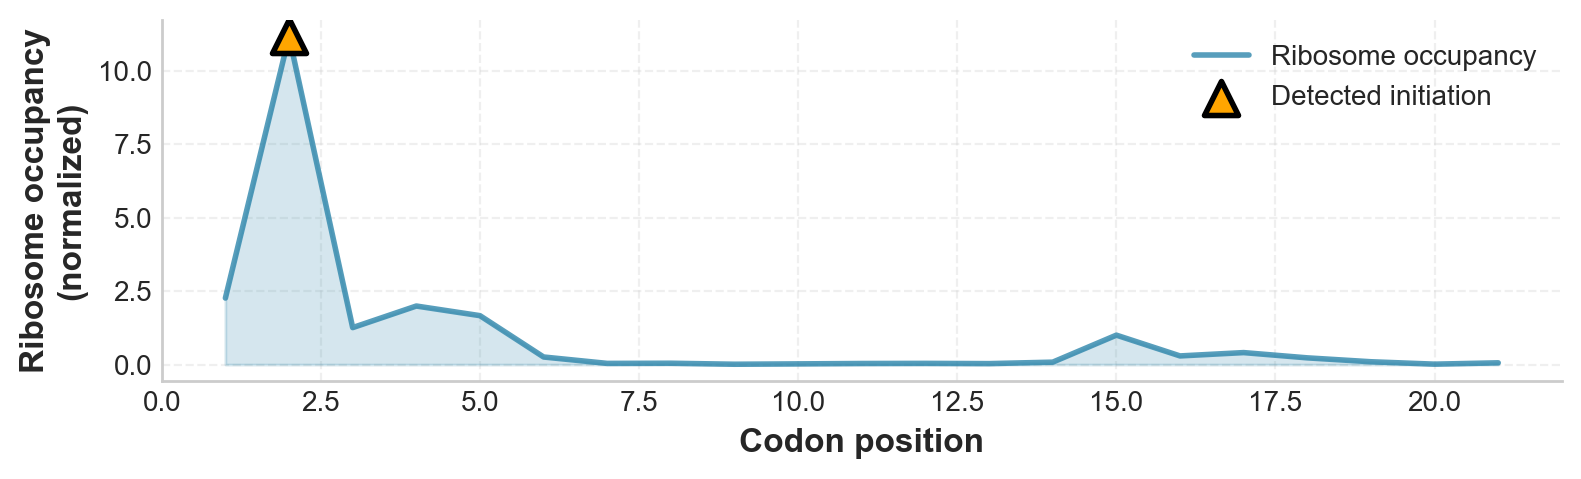

In [18]:
reload(mrae)
# Analyze initiation for a single gene
gene_id = 'gene_SHLP6'
init_data_path = os.path.join(PATH, 'data', 'hek_ini',  'mito_cumsum_table_with_gene_ids.csv')
mrae.quick_initiation_analysis(table_path = init_data_path, gene_id=gene_id, output_dir = os.path.join(PATH, 'figures', 'hek_ini_mitoriboseq', 'initiation_analysis_single_gene'), figsize = (8,2.5))

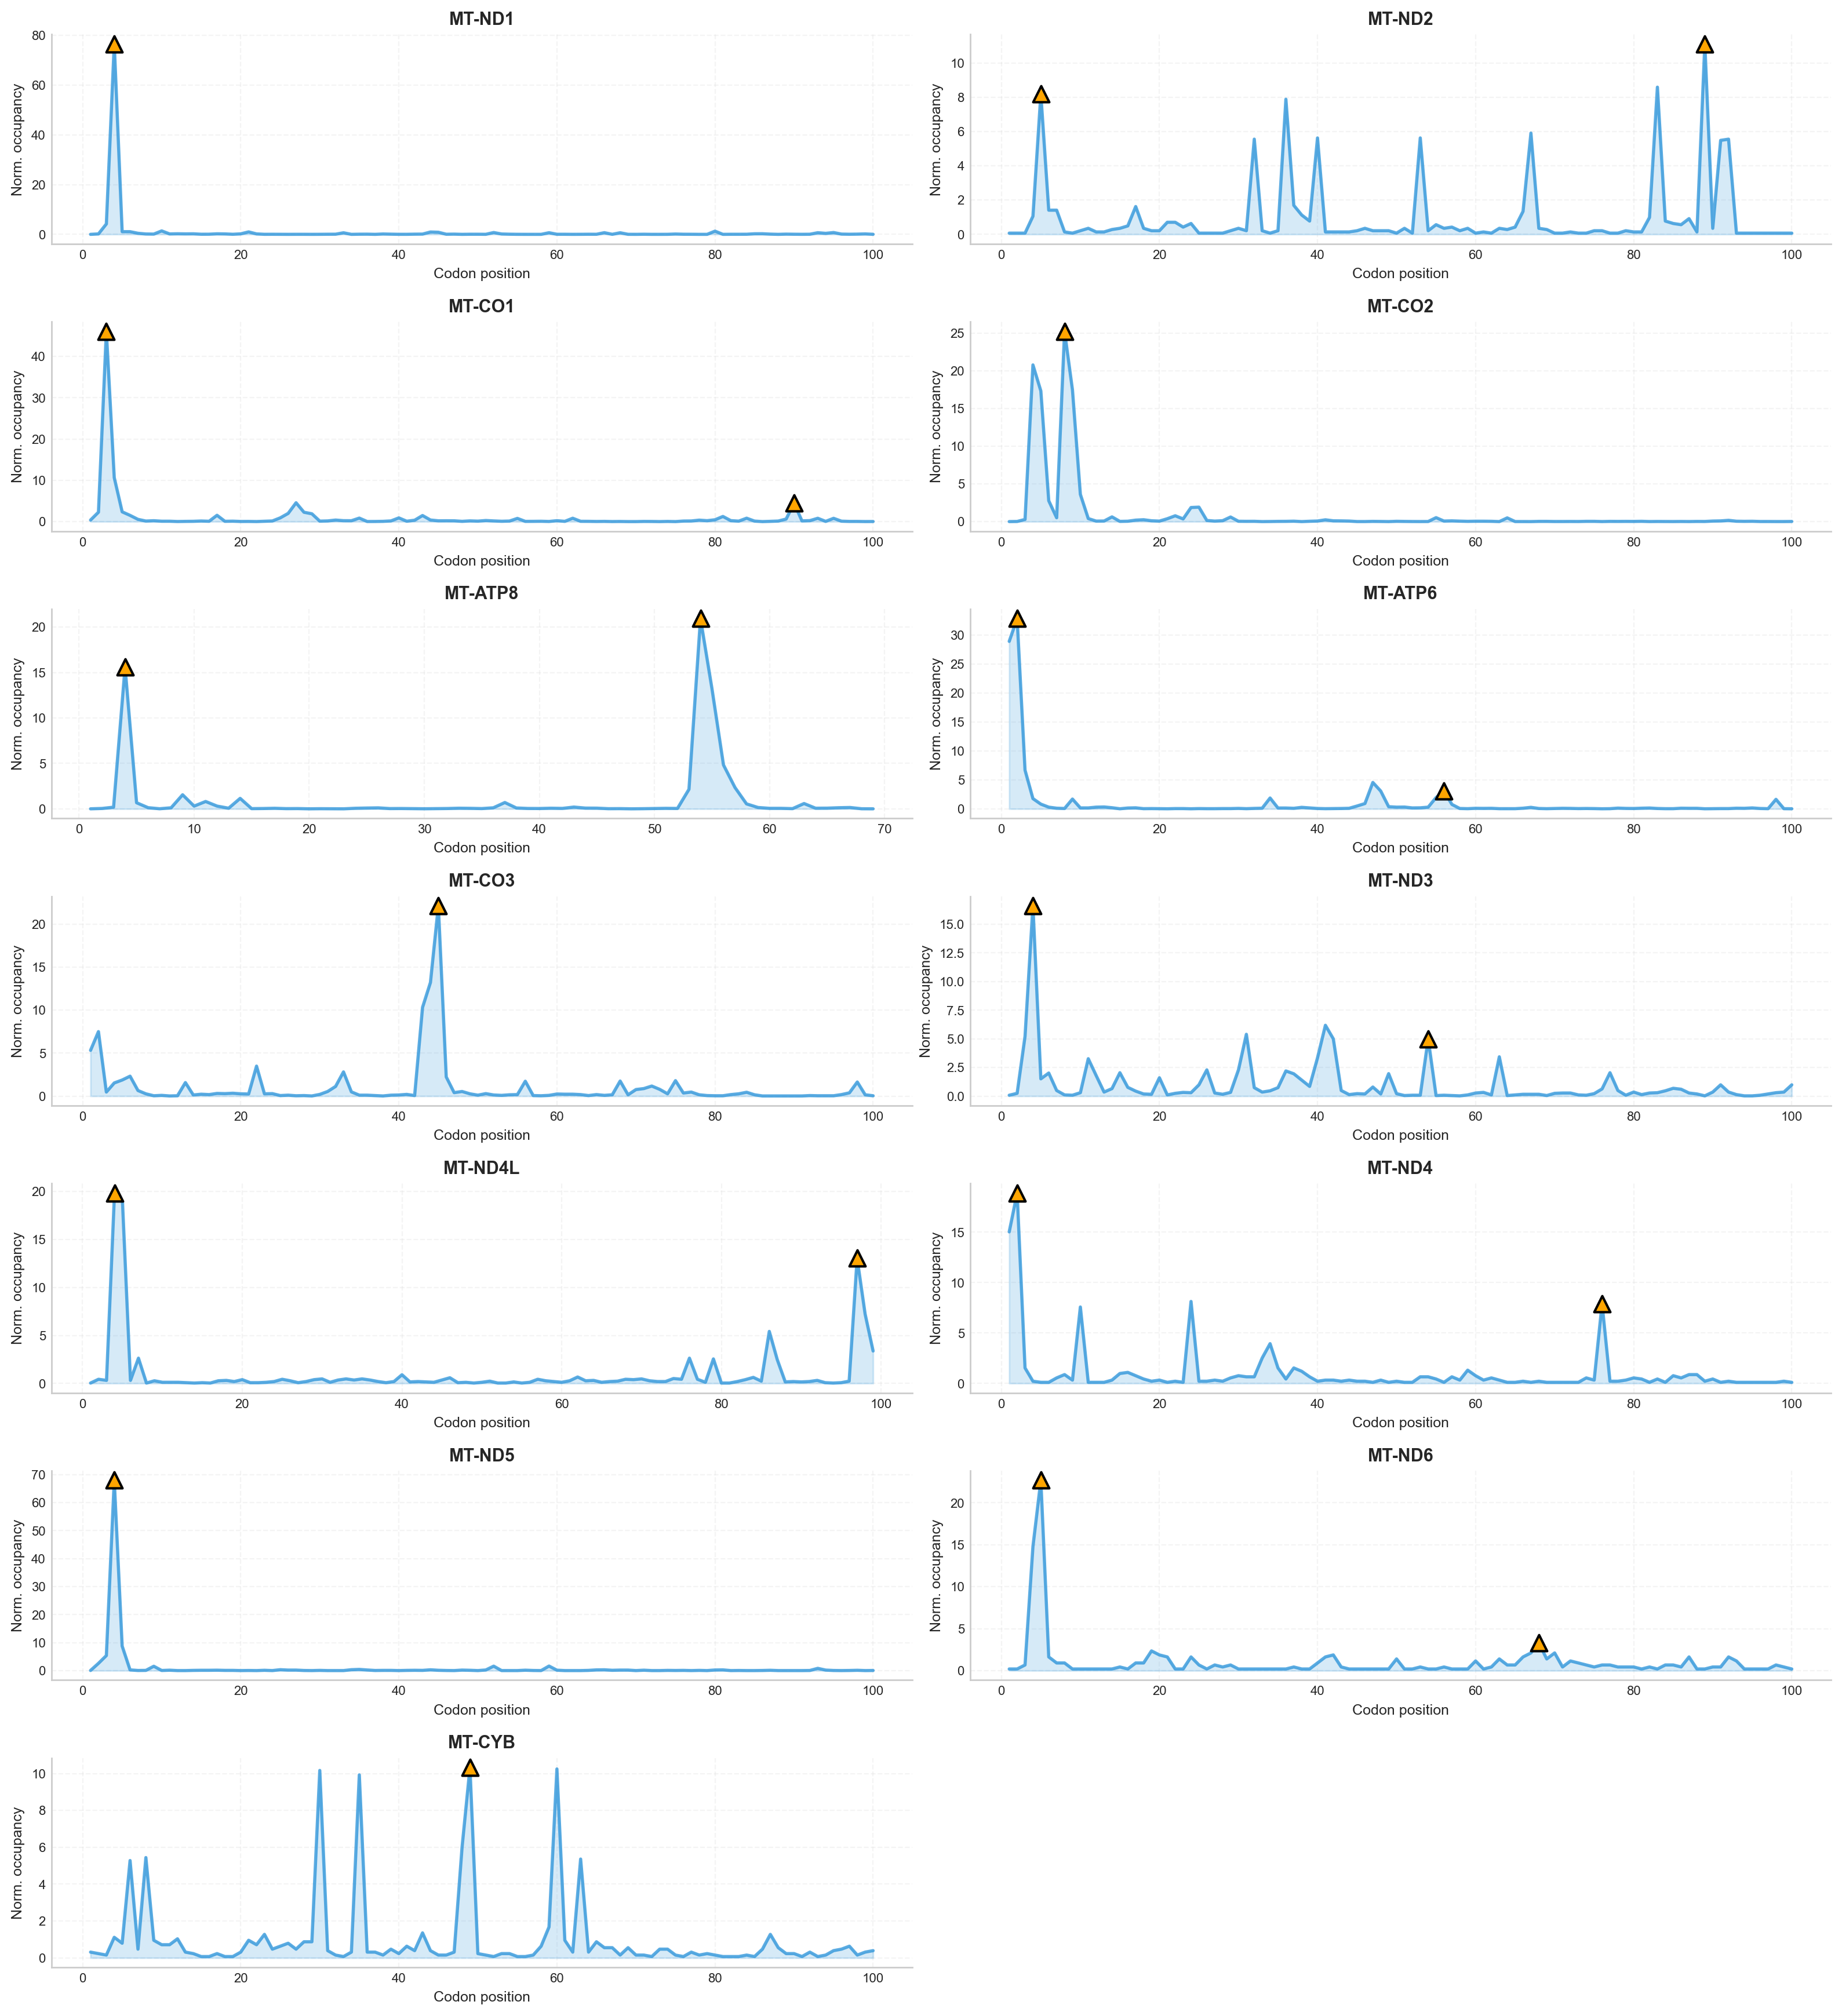

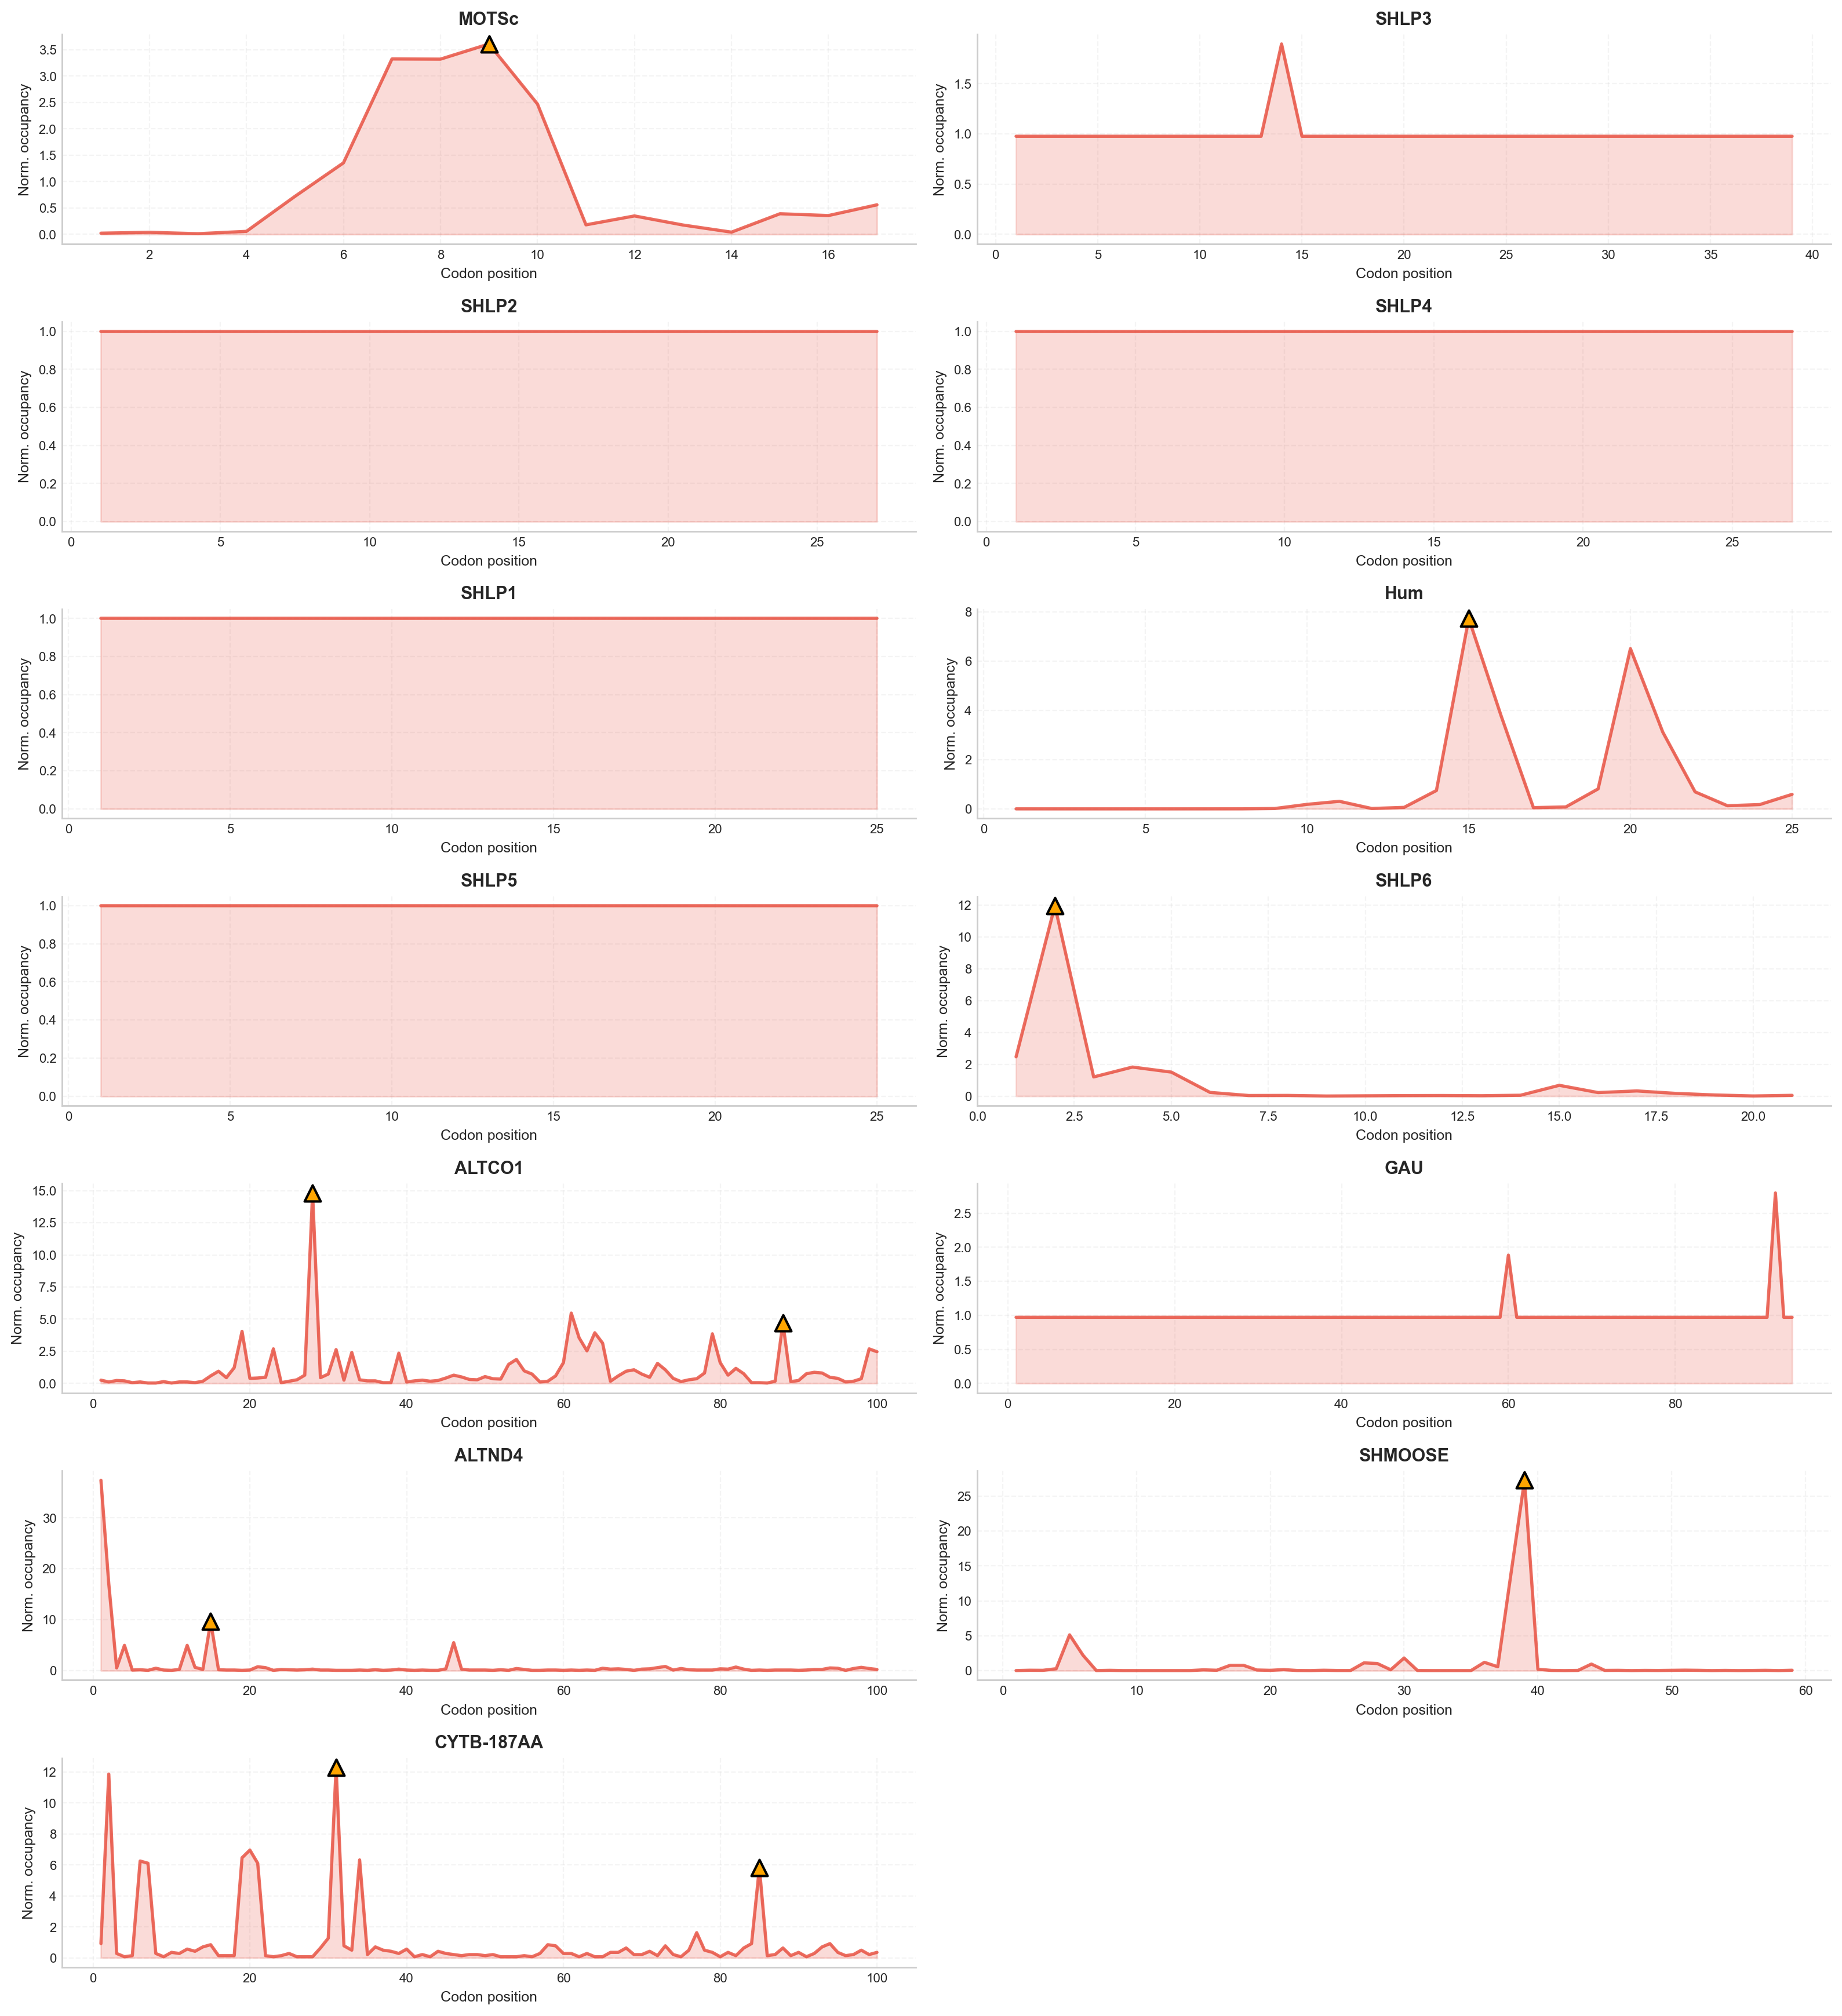

In [19]:
reload(mrae)
# Plot the initiation profile of all canonical genes
init_data_canonical = mrae.batch_initiation_analysis(df = df_init, gene_ids = canonical_genes, output_dir = os.path.join(PATH, 'figures', 'hek_ini_mitoriboseq', 'initiation_analysis_all_genes'), figsize_per_plot = (8,2.5), ncols = 2)
# Plot the initiation profile of all overlapping genes
init_data_overlapping = mrae.batch_initiation_analysis(df = df_init, gene_ids = overlapping_genes, output_dir = os.path.join(PATH, 'figures', 'hek_ini_mitoriboseq', 'initiation_analysis_all_overlapping_genes'), figsize_per_plot = (8,2.5), ncols = 2)

Comparing 13 alternative genes to canonical metagene...
  Analyzing MT-ND1... Saved comparison to c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\mitoriboseq_analysis\figures\hek_ini_mitoriboseq\canonical_genes_validation_summary\MT-ND1_vs_canonical.jpg
Score: 0.969
  Analyzing MT-ND2... Saved comparison to c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\mitoriboseq_analysis\figures\hek_ini_mitoriboseq\canonical_genes_validation_summary\MT-ND2_vs_canonical.jpg
Score: 0.483
  Analyzing MT-CO1... Saved comparison to c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\mitoriboseq_analysis\figures\hek_ini_mitoriboseq\canonical_genes_validation_summary\MT-CO1_vs_canonical.jpg
Score: 0.843
  Analyzing MT-CO2... Saved comparison to c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\mitoriboseq_analysis\figures\hek_ini_mitoriboseq\canonical_genes_validation_summary\MT-CO2_vs_canonical.jpg
Score: 0.828


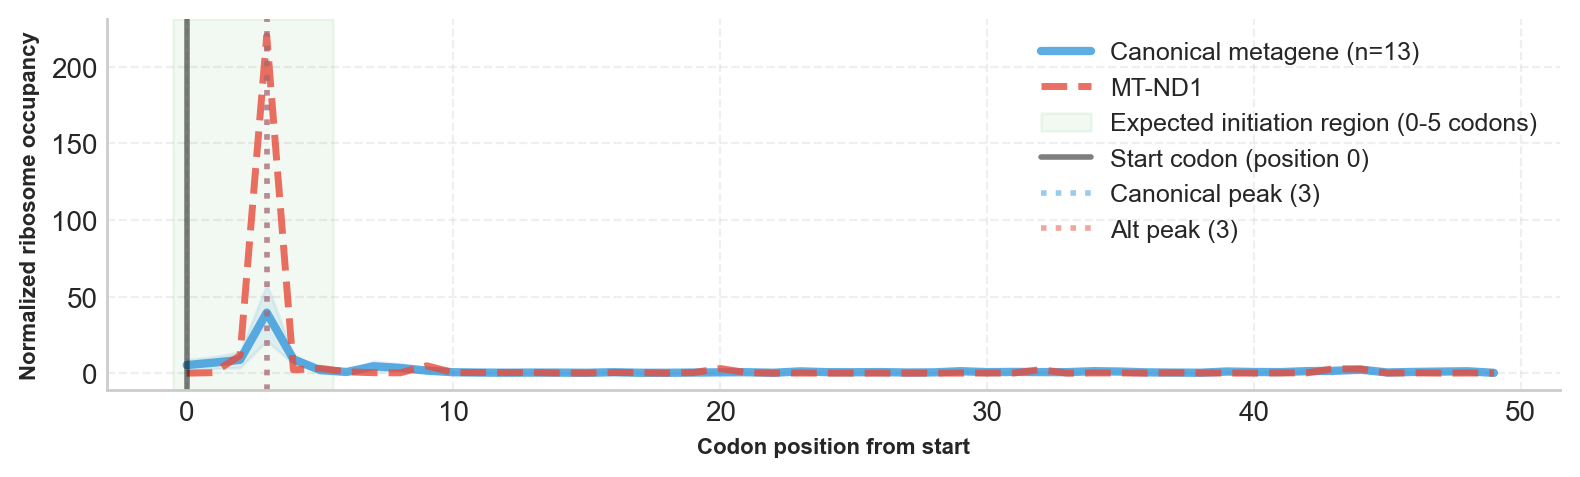

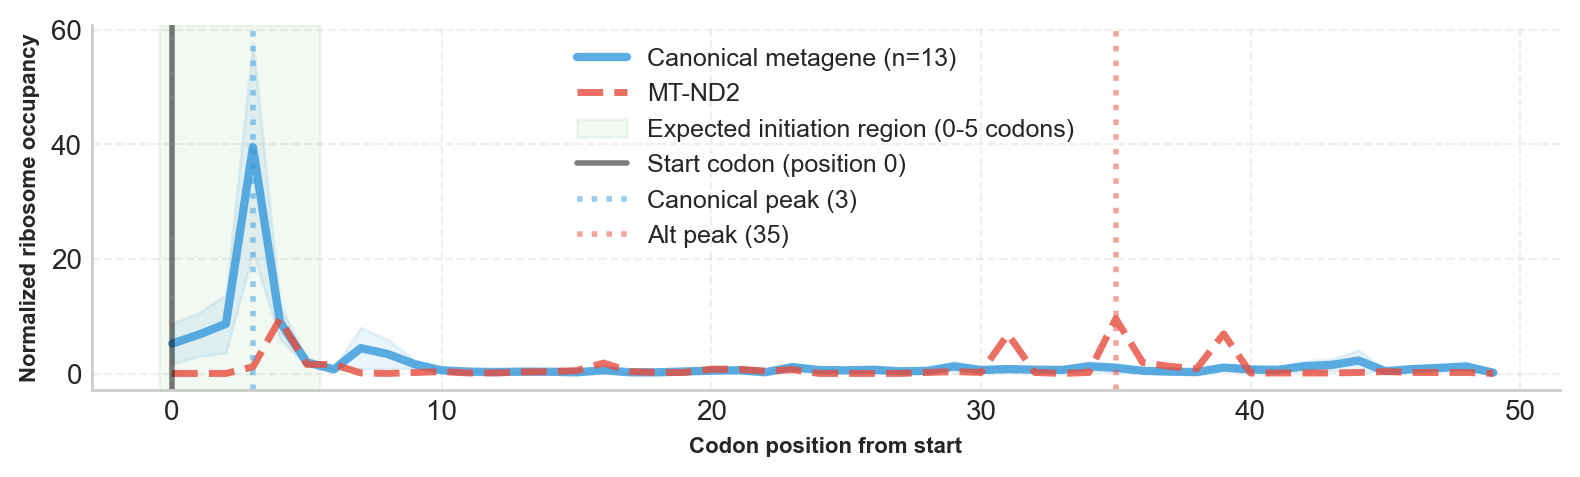

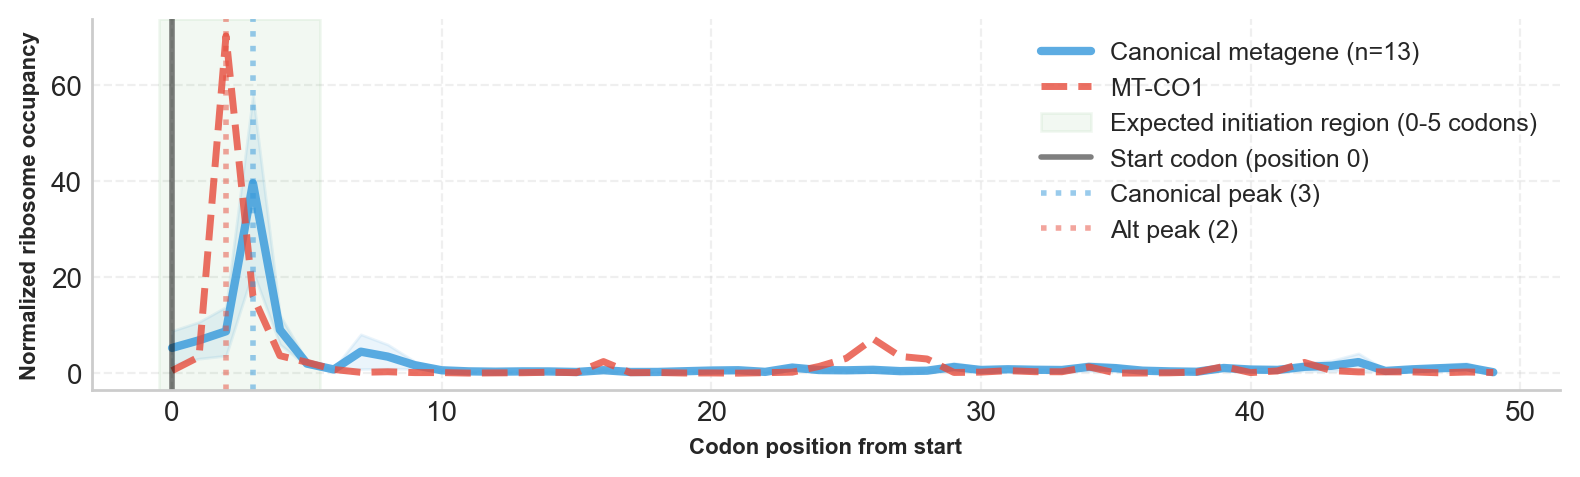

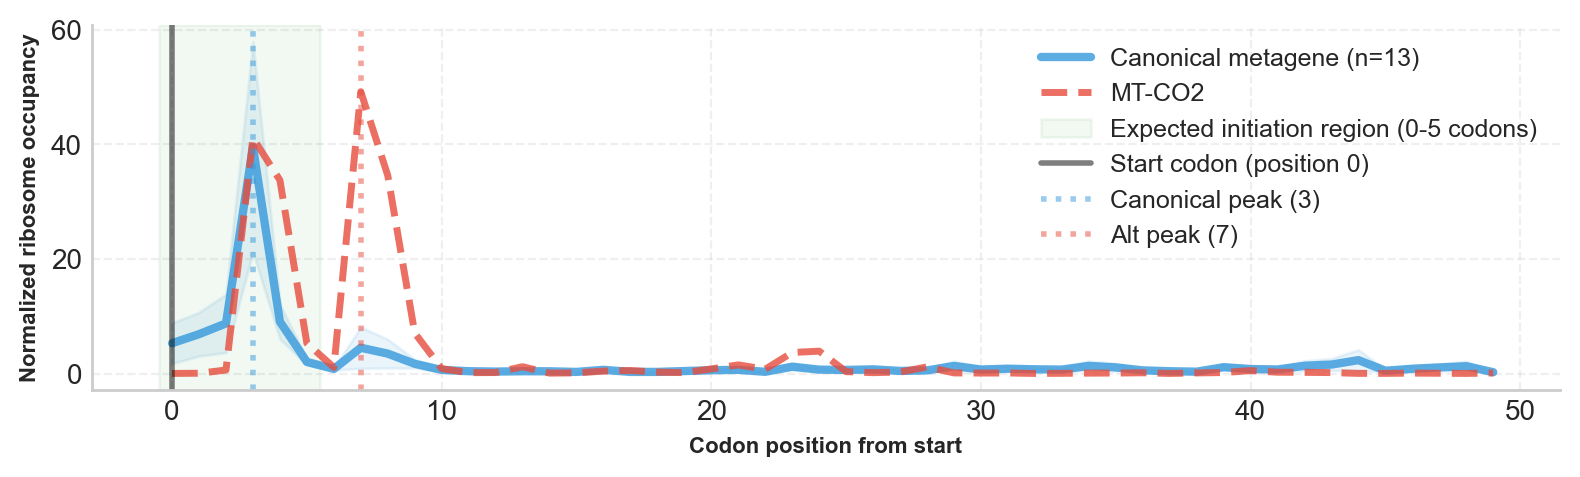

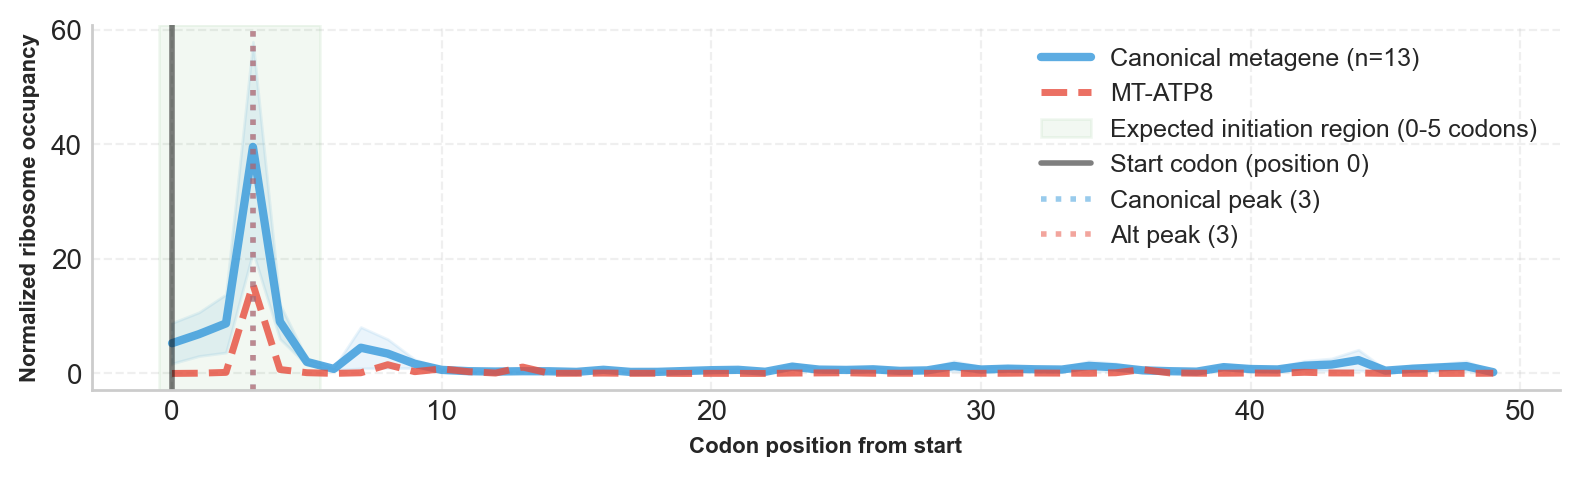

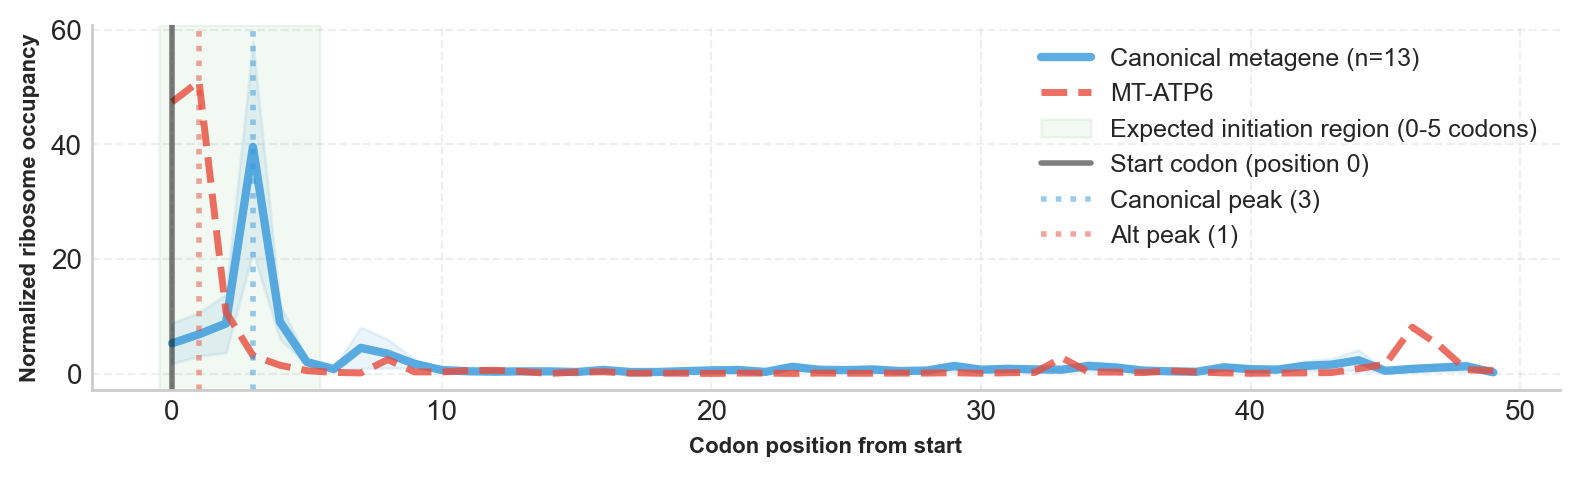

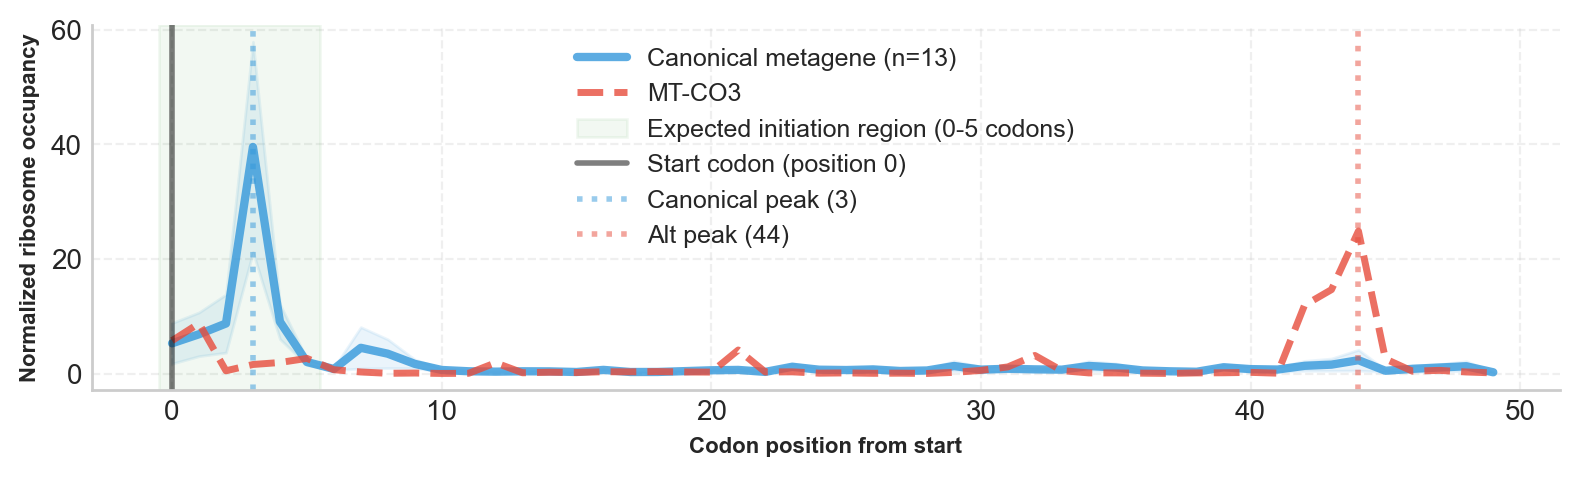

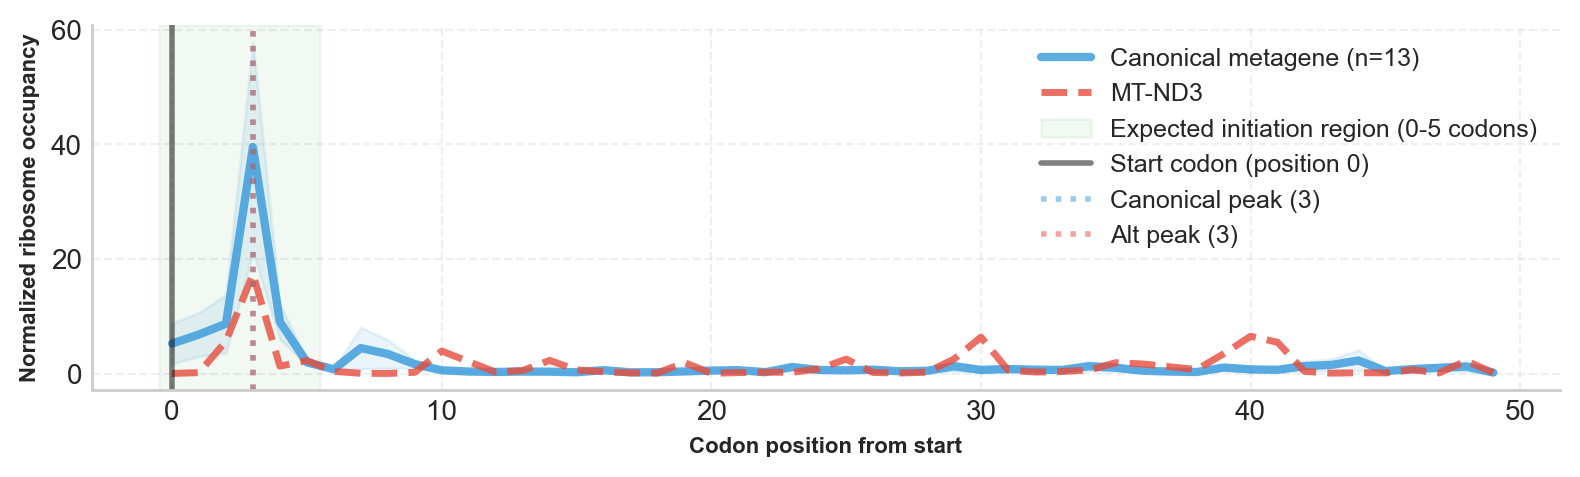

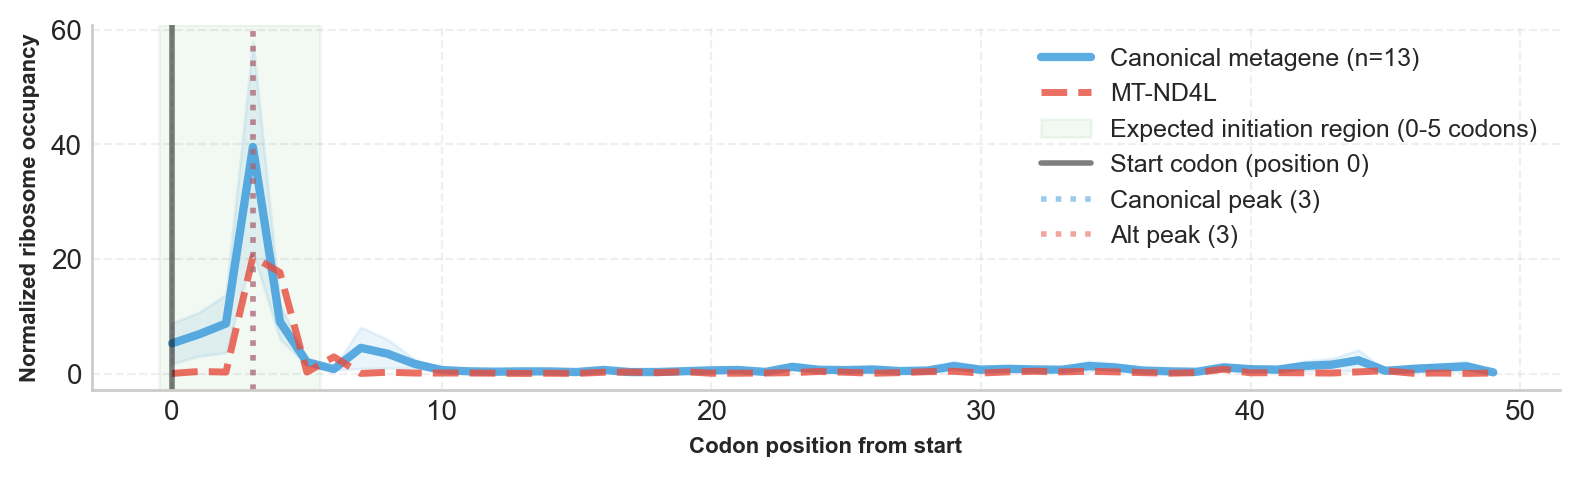

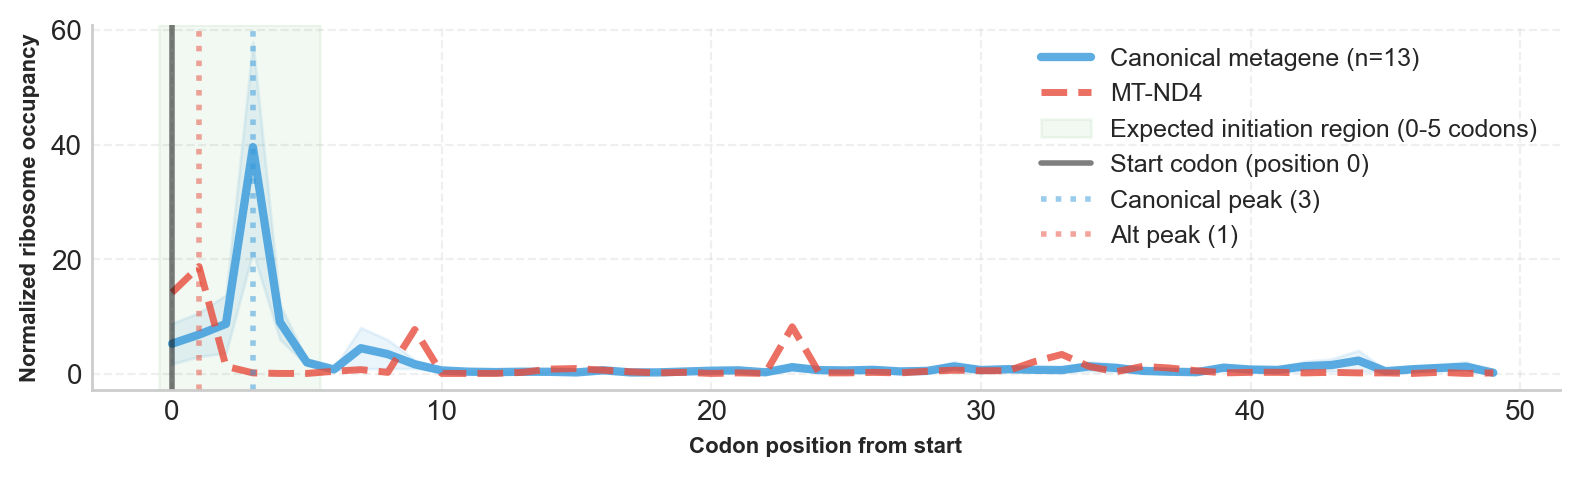

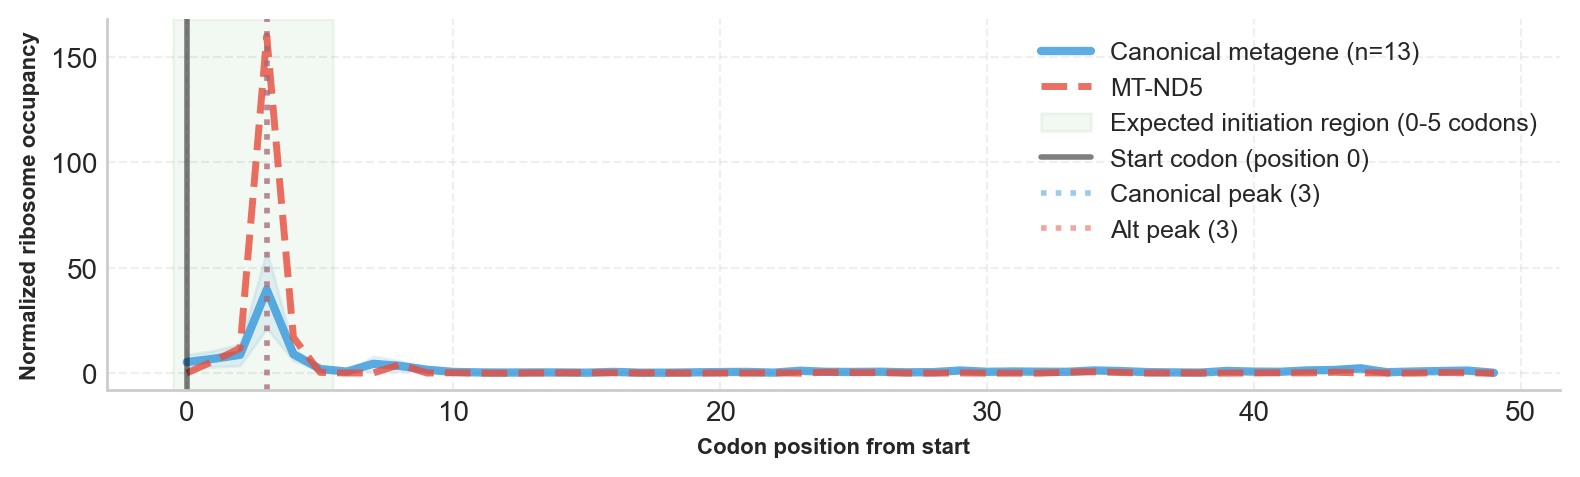

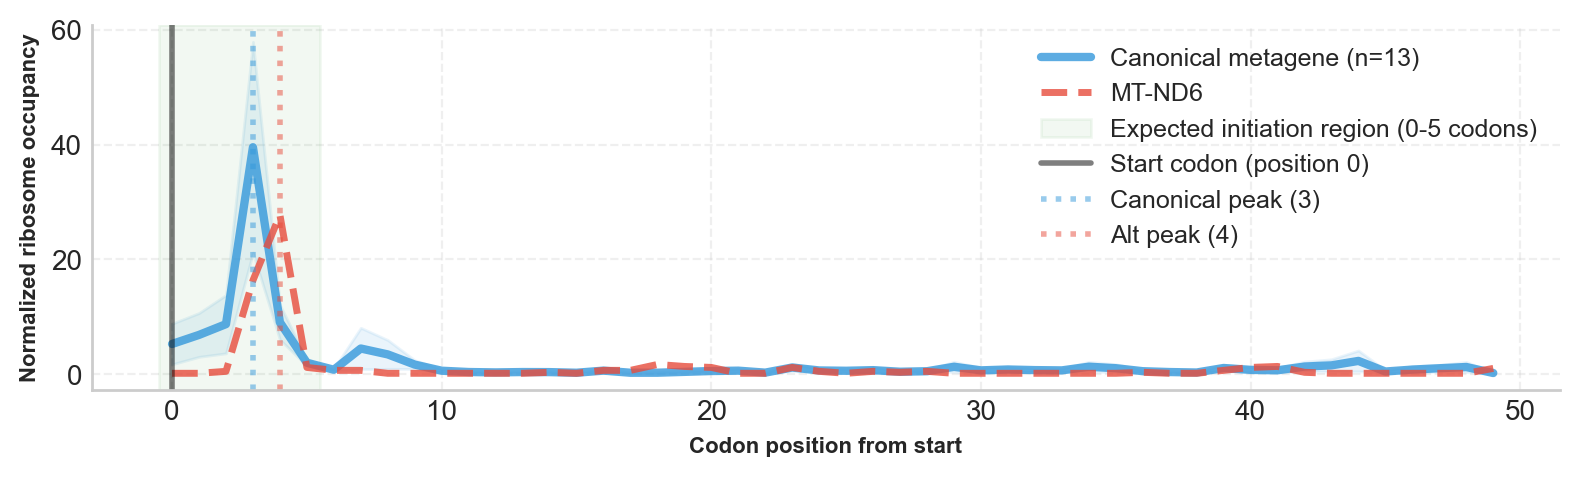

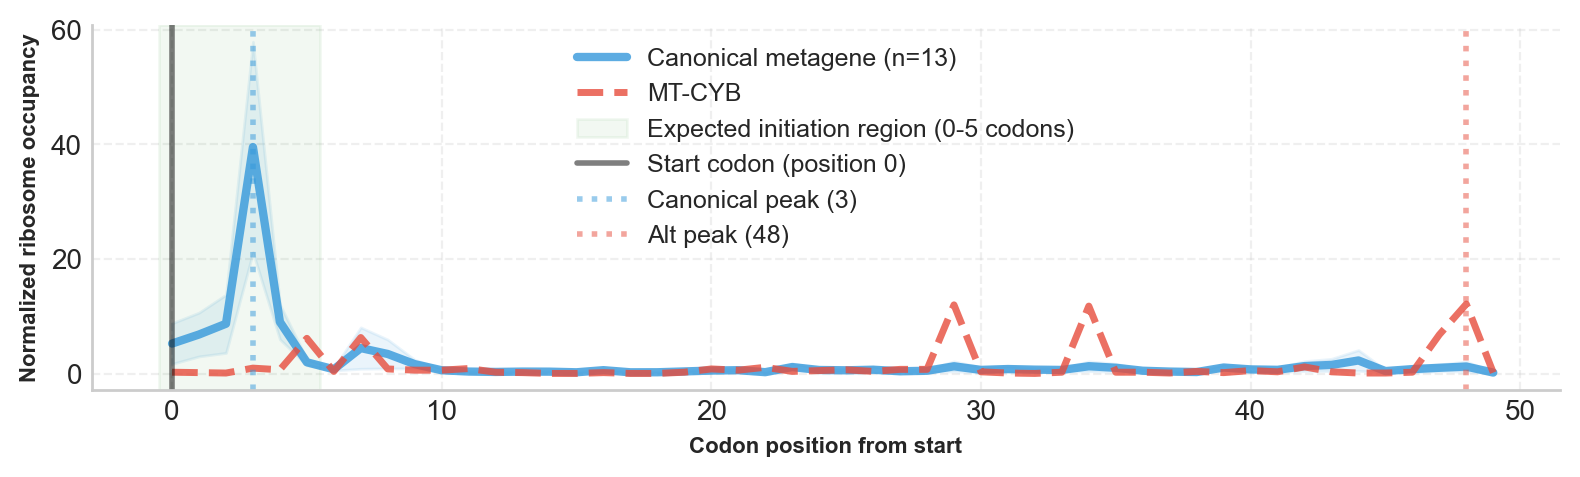

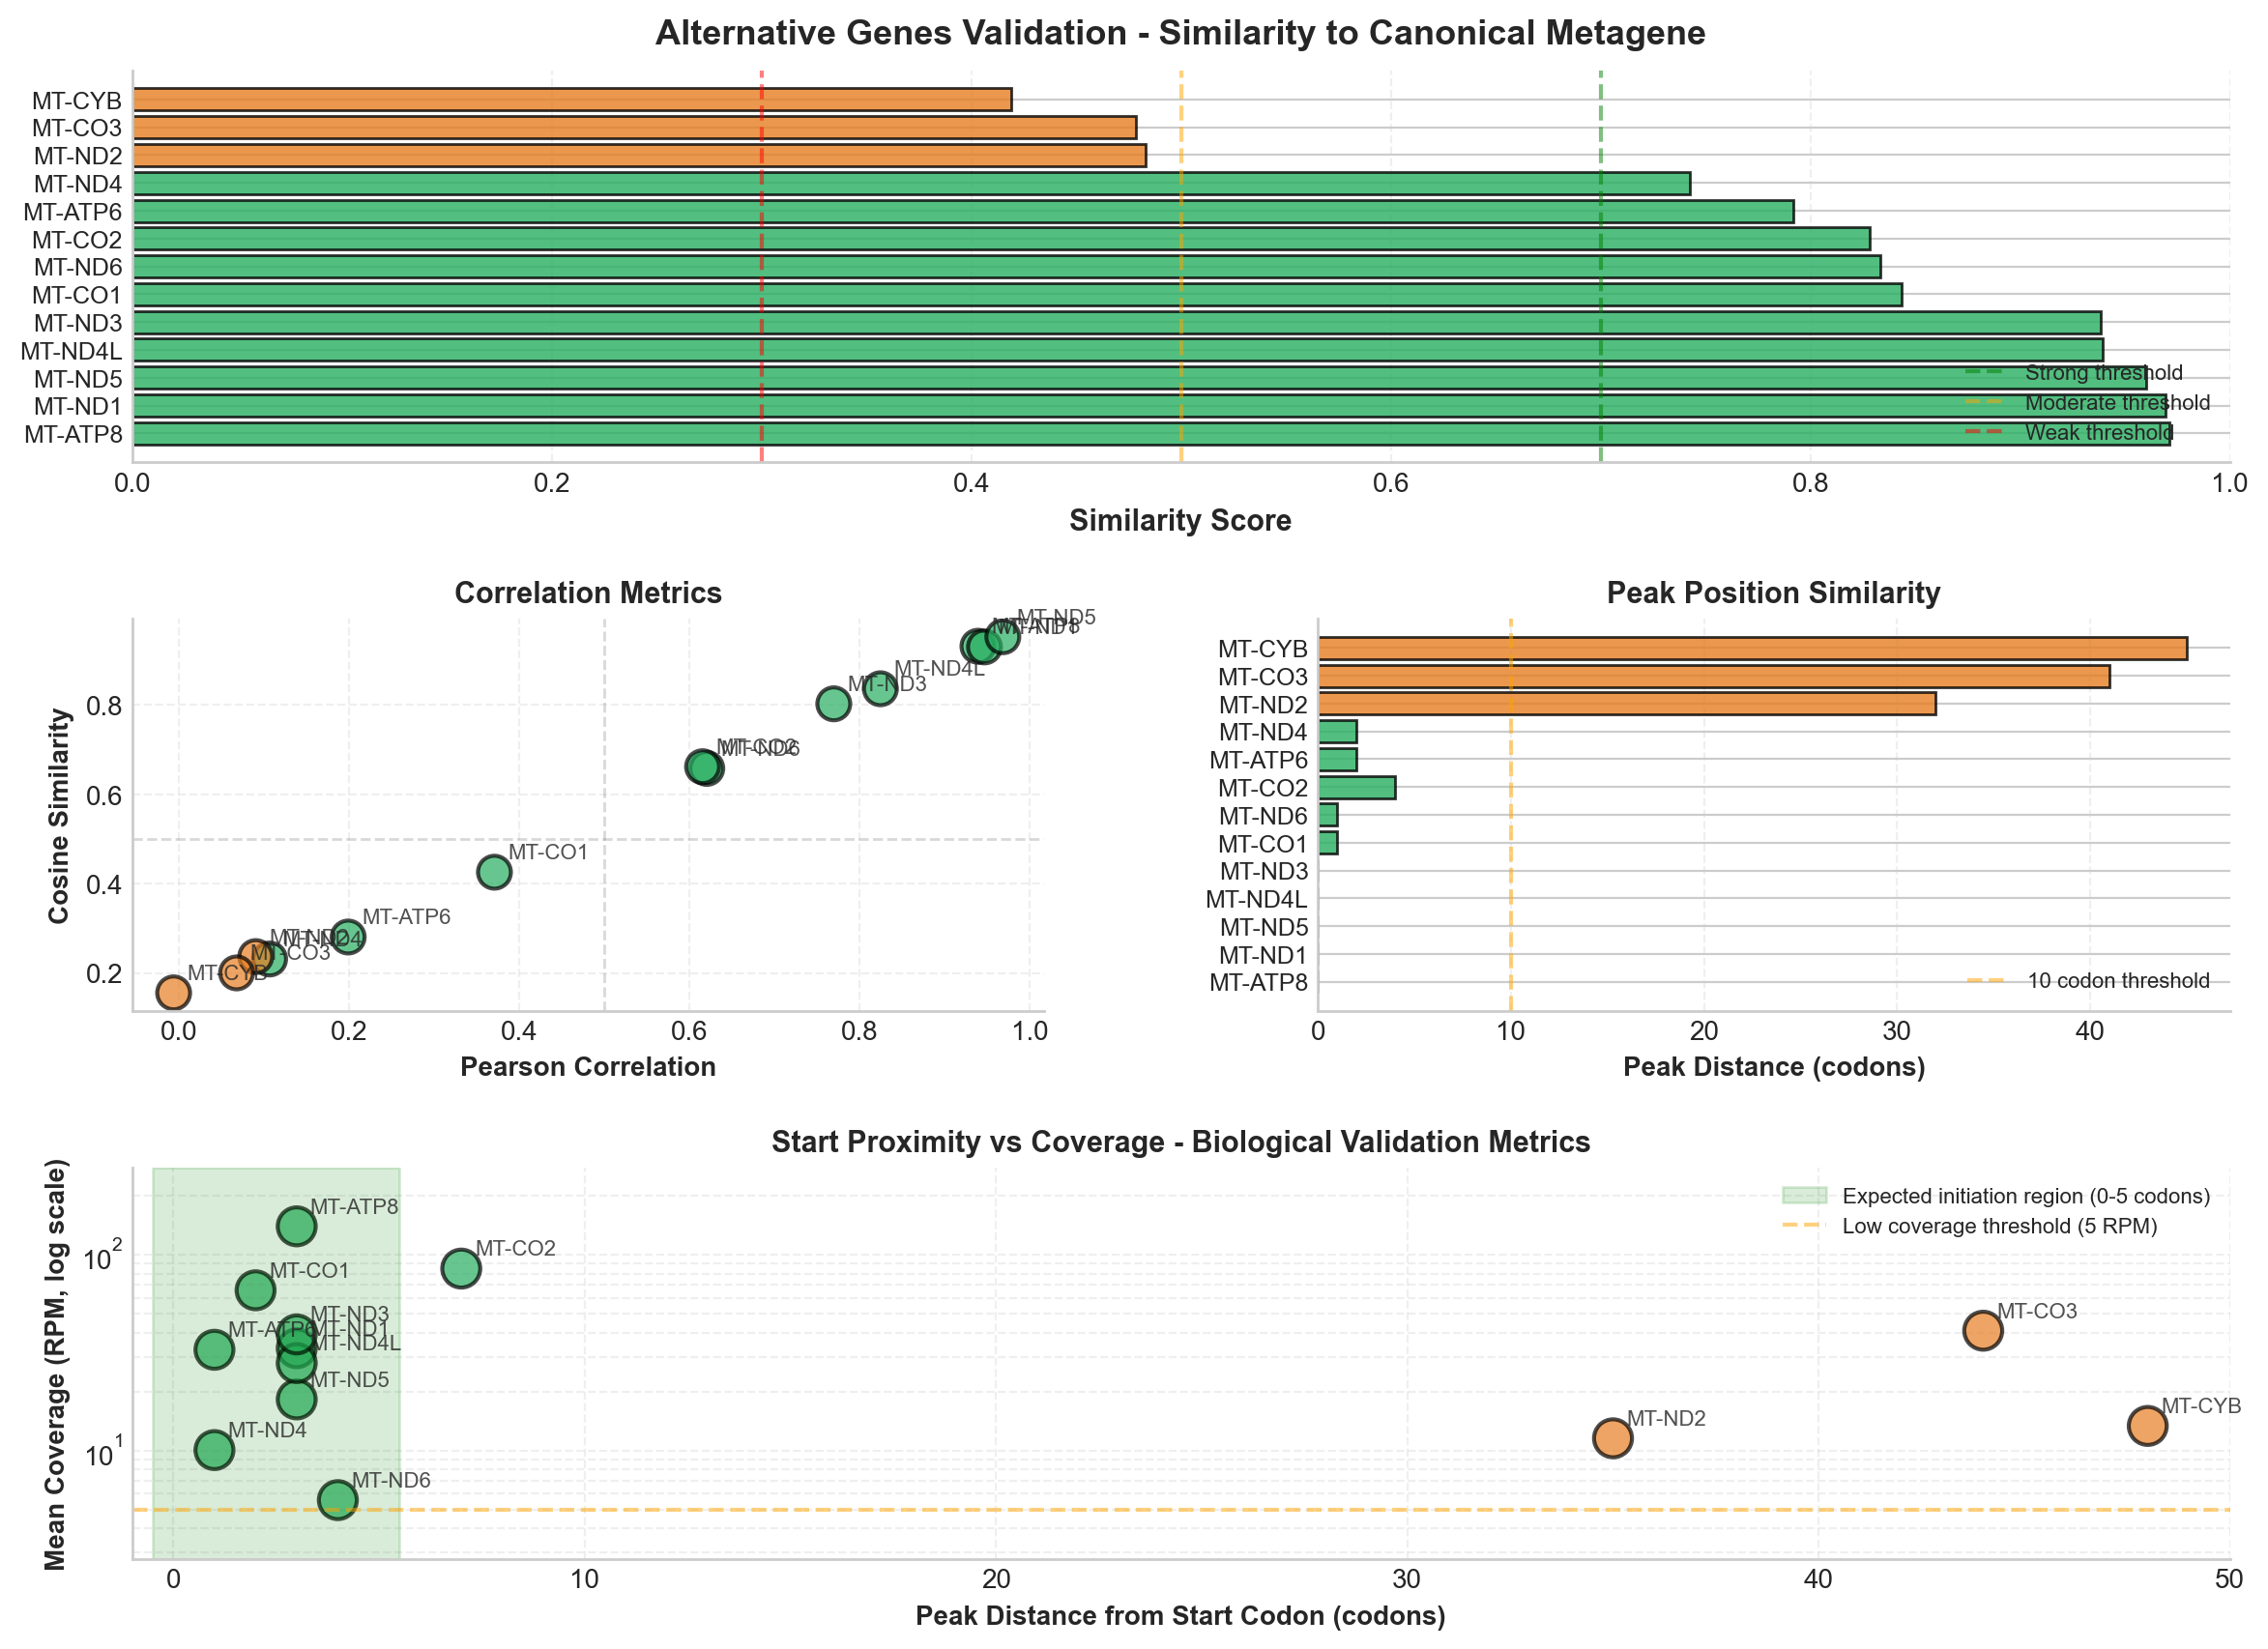

In [20]:
# As a confirmation, calculate the similarity scores for all canonical genes
similarity_results_canonical, summary_fig_canonical = mrae.batch_compare_to_canonical(df = df_init, alternative_gene_ids = canonical_genes, output_dir = os.path.join(PATH, 'figures', 'hek_ini_mitoriboseq', 'canonical_genes_validation_summary'),  plot_individual = True, indiv_figsize = (8,2.5), plot_metrics = False)

Comparing 13 alternative genes to canonical metagene...
  Analyzing gene_MOTSc... Saved comparison to c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\mitoriboseq_analysis\figures\hek_ini_mitoriboseq\initiation_comparison_all_overlapping_genes\MOTSc_vs_canonical.jpg
Score: 0.604
  Analyzing gene_SHLP3... Saved comparison to c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\mitoriboseq_analysis\figures\hek_ini_mitoriboseq\initiation_comparison_all_overlapping_genes\SHLP3_vs_canonical.jpg
Score: 0.490
  Analyzing gene_SHLP2... Saved comparison to c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\mitoriboseq_analysis\figures\hek_ini_mitoriboseq\initiation_comparison_all_overlapping_genes\SHLP2_vs_canonical.jpg
Score: 0.687
  Analyzing gene_SHLP4... Saved comparison to c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\mitoriboseq_analysis\figures\hek_ini_mitoriboseq\initiation_comparison_all_overla

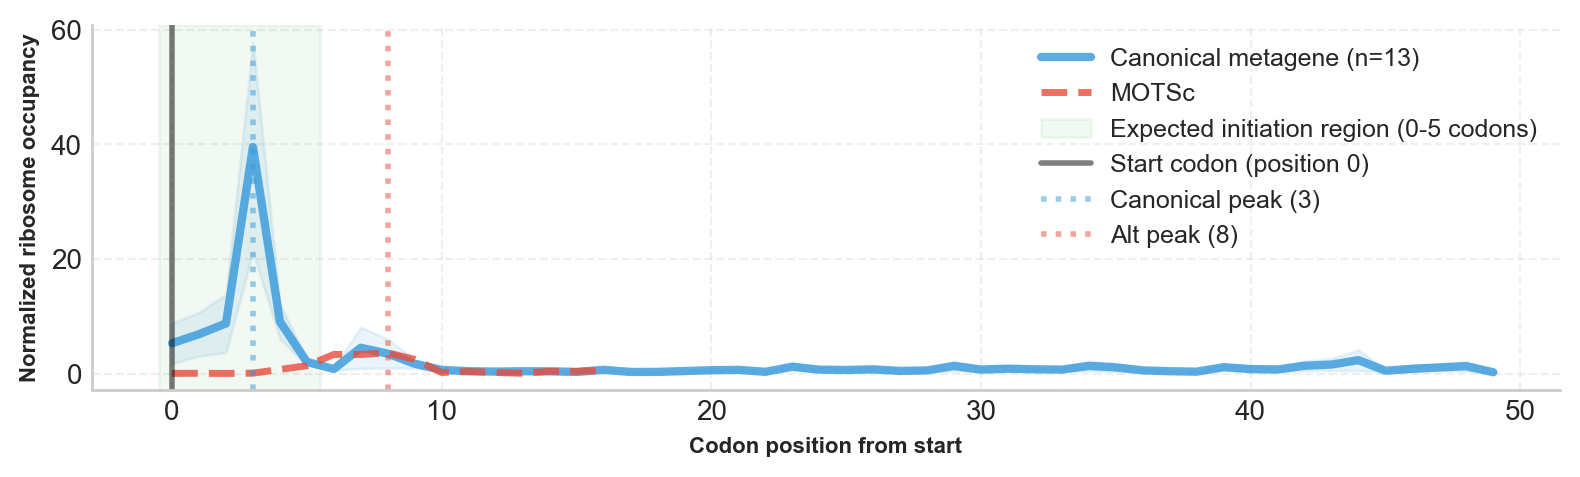

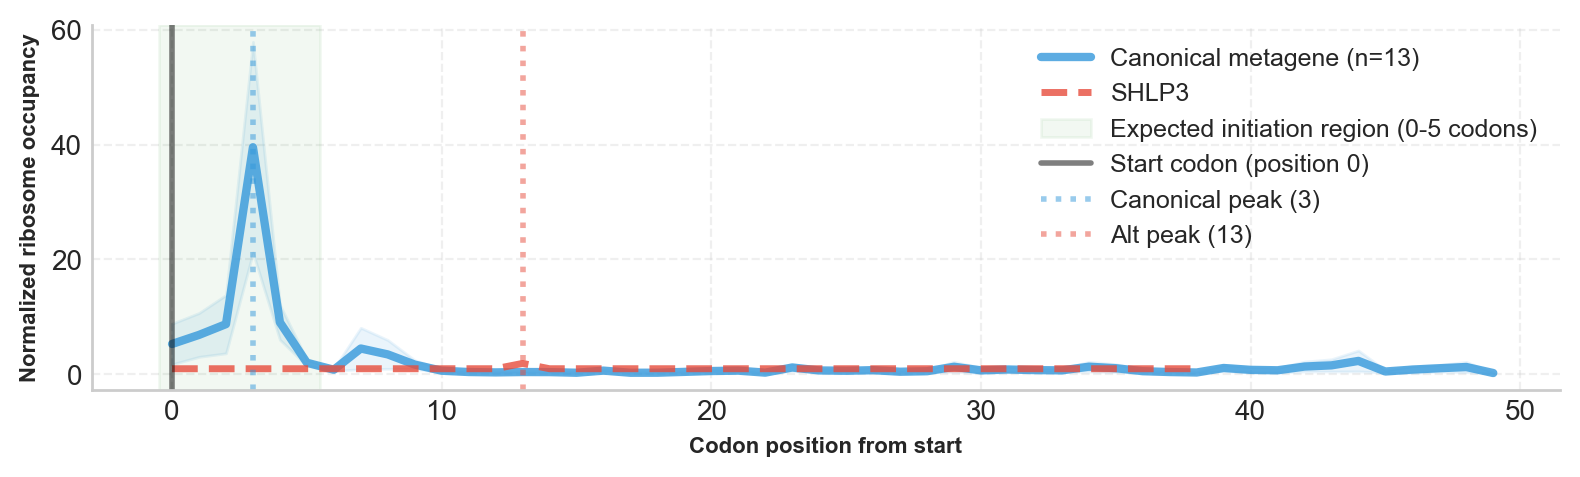

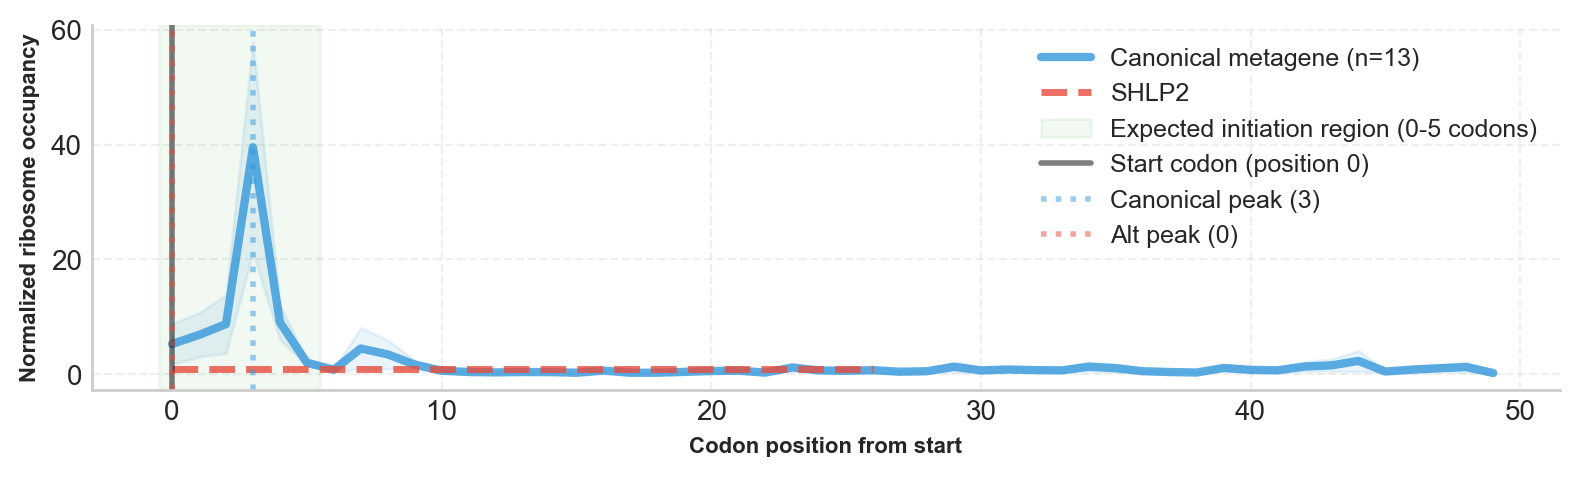

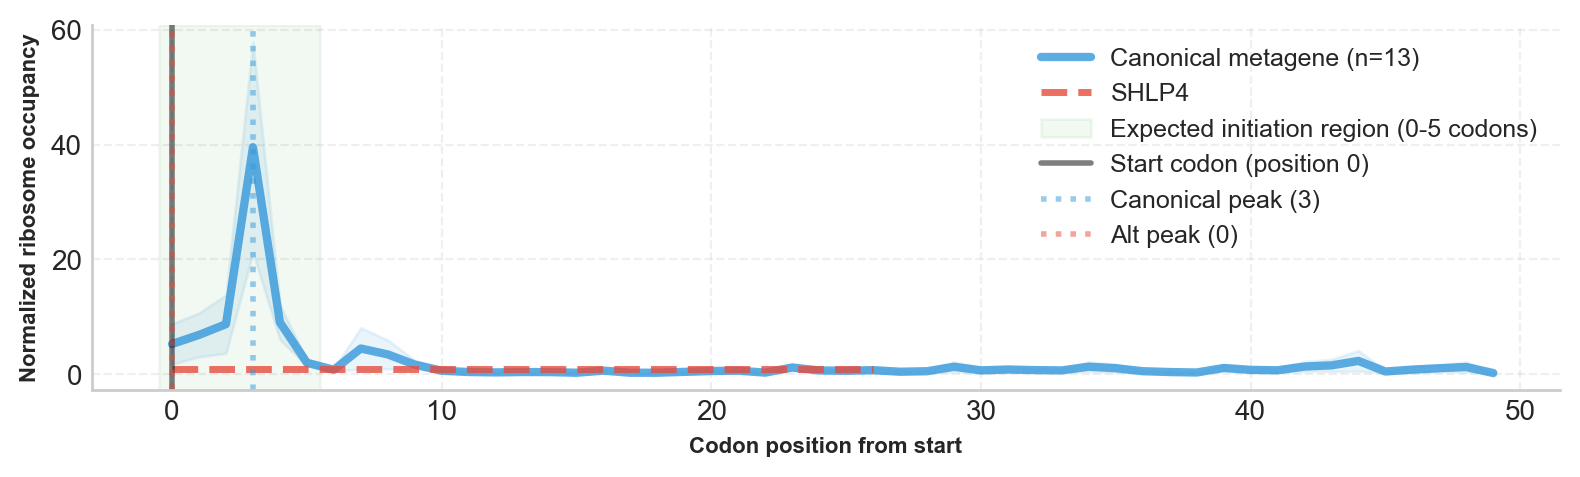

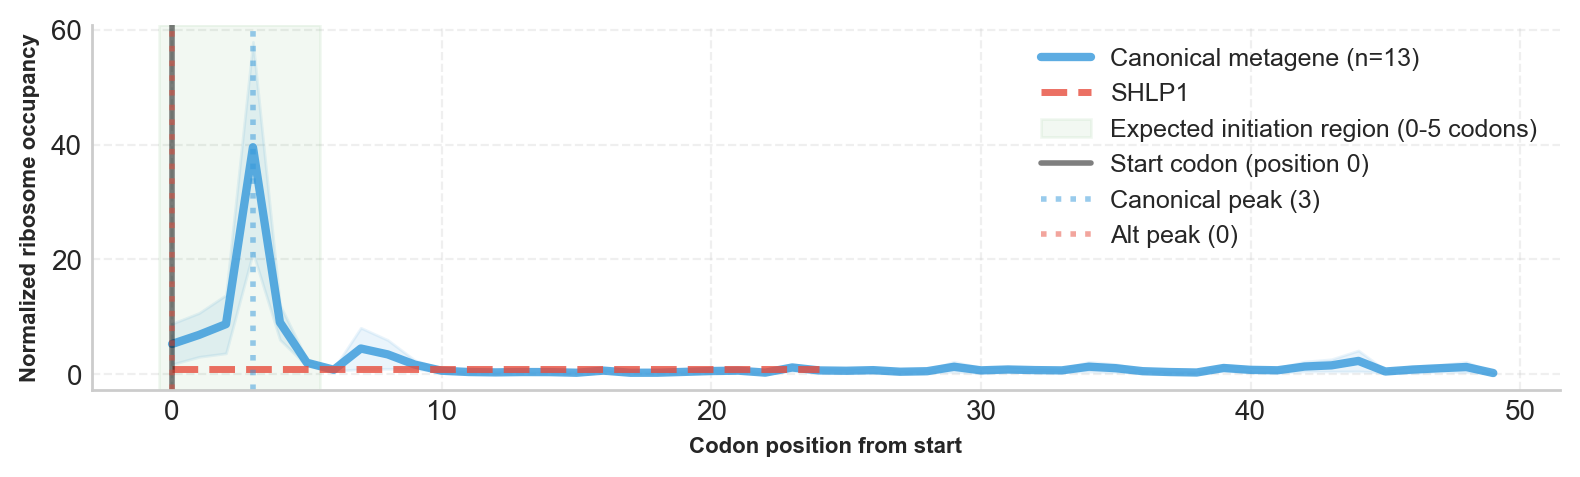

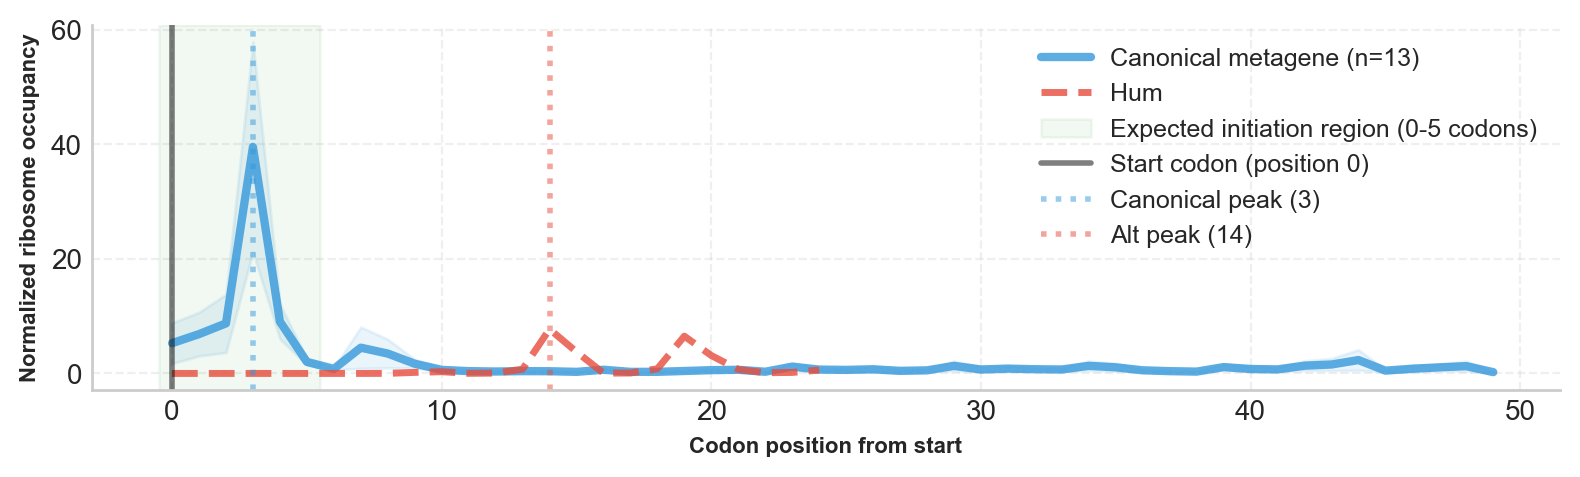

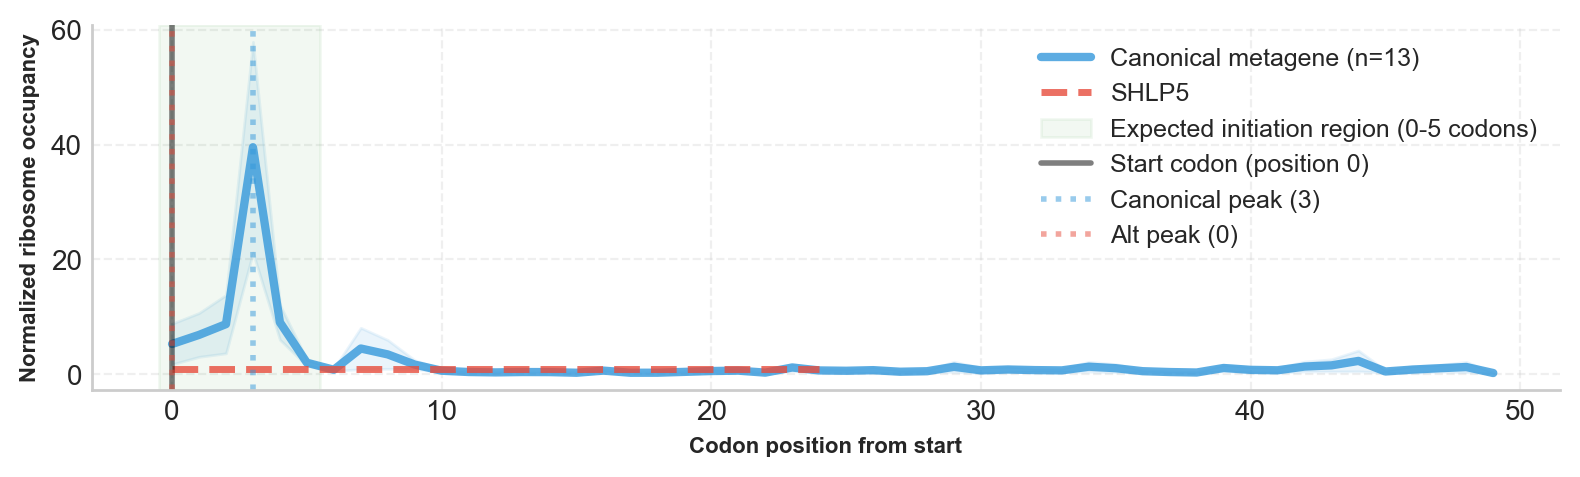

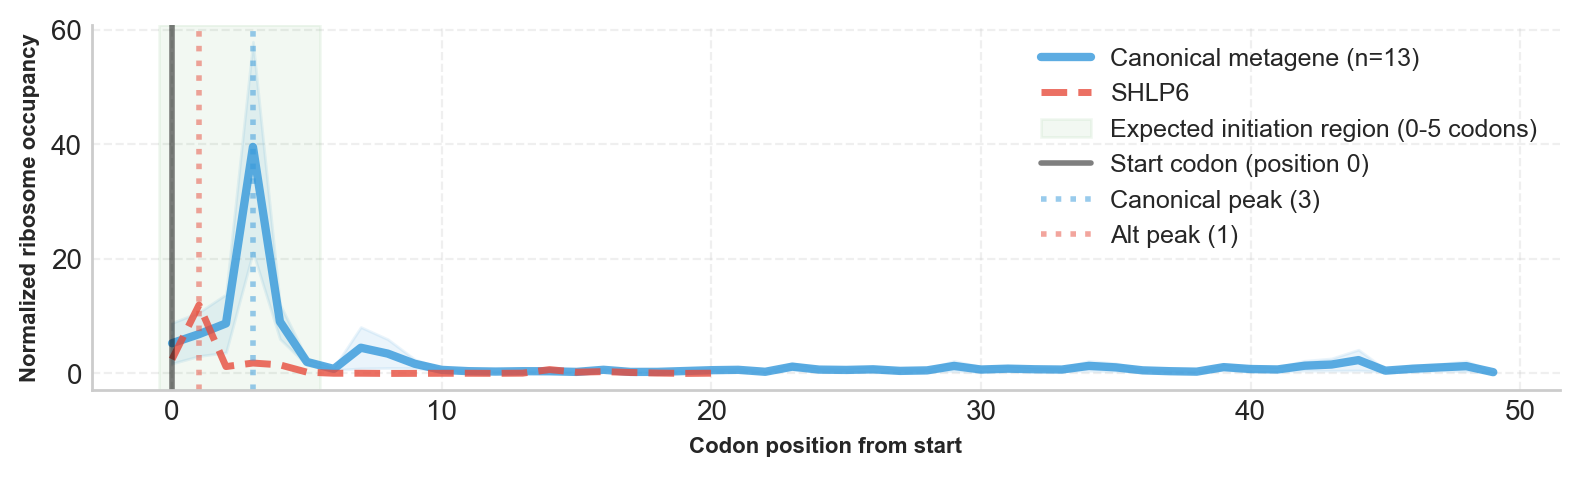

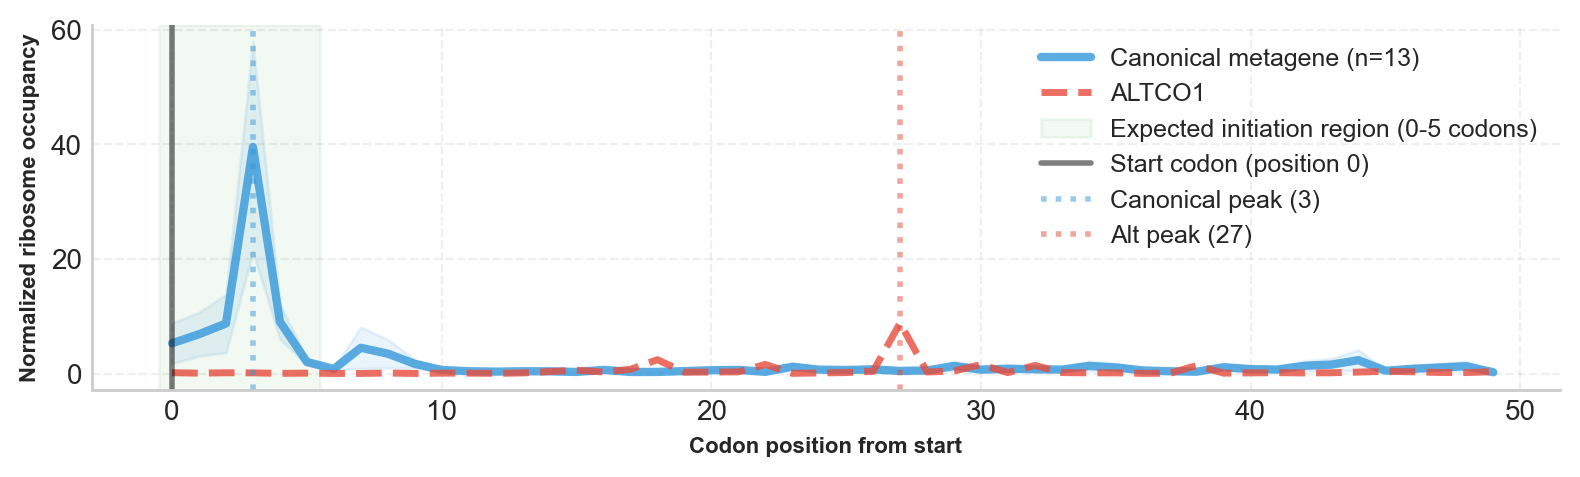

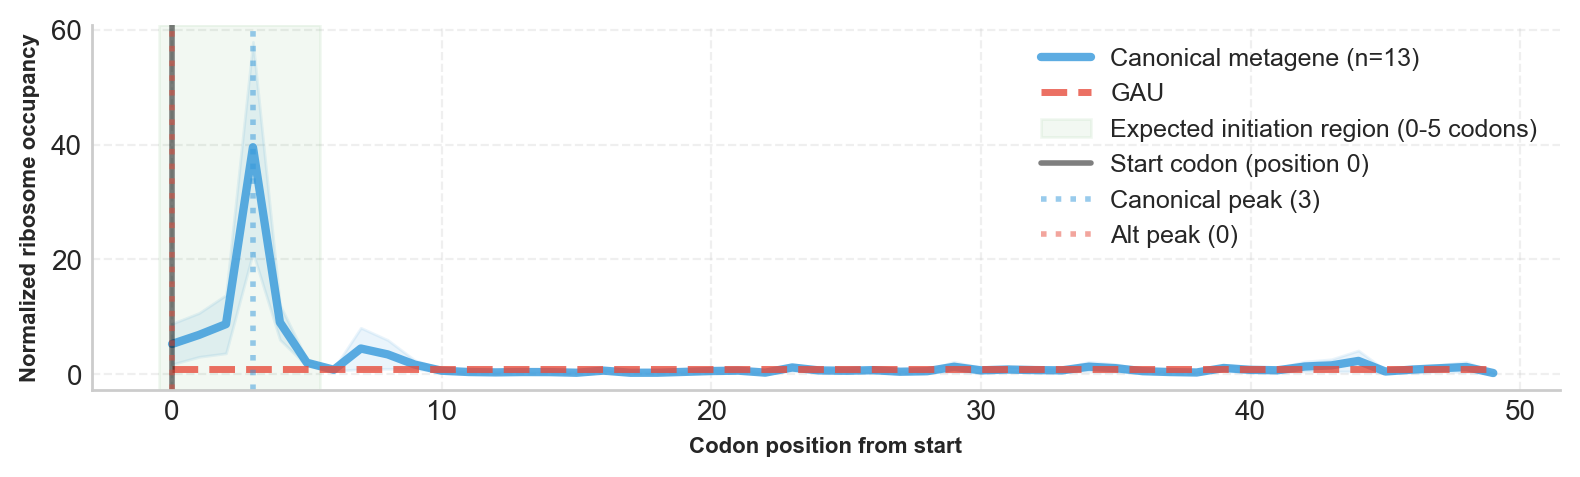

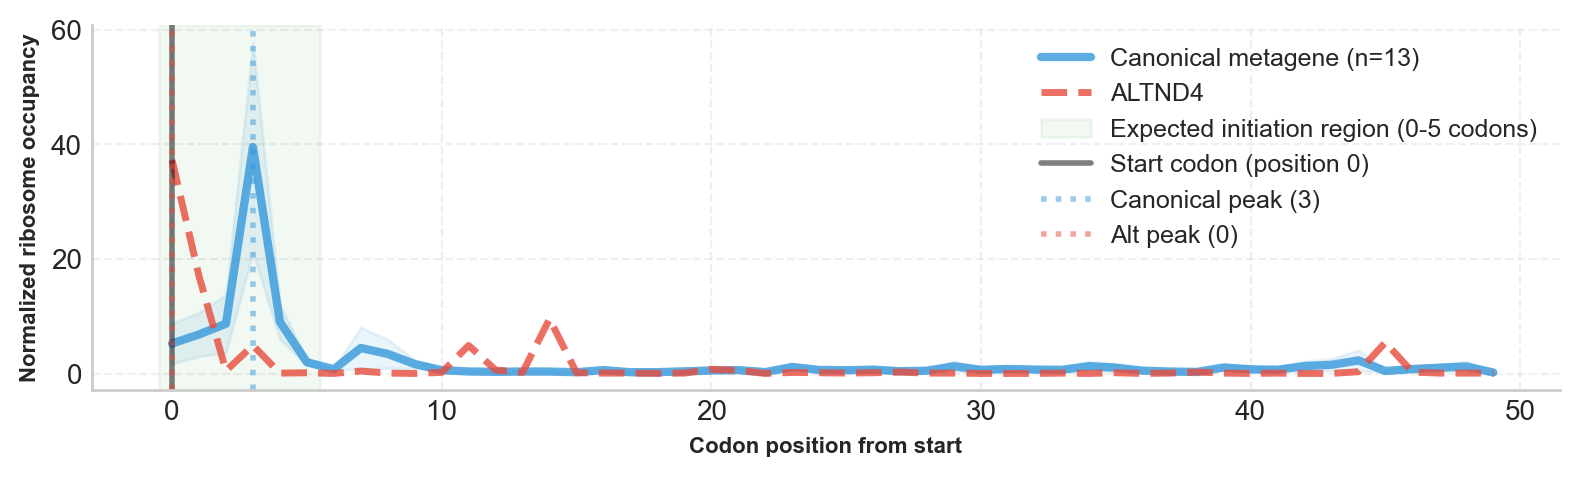

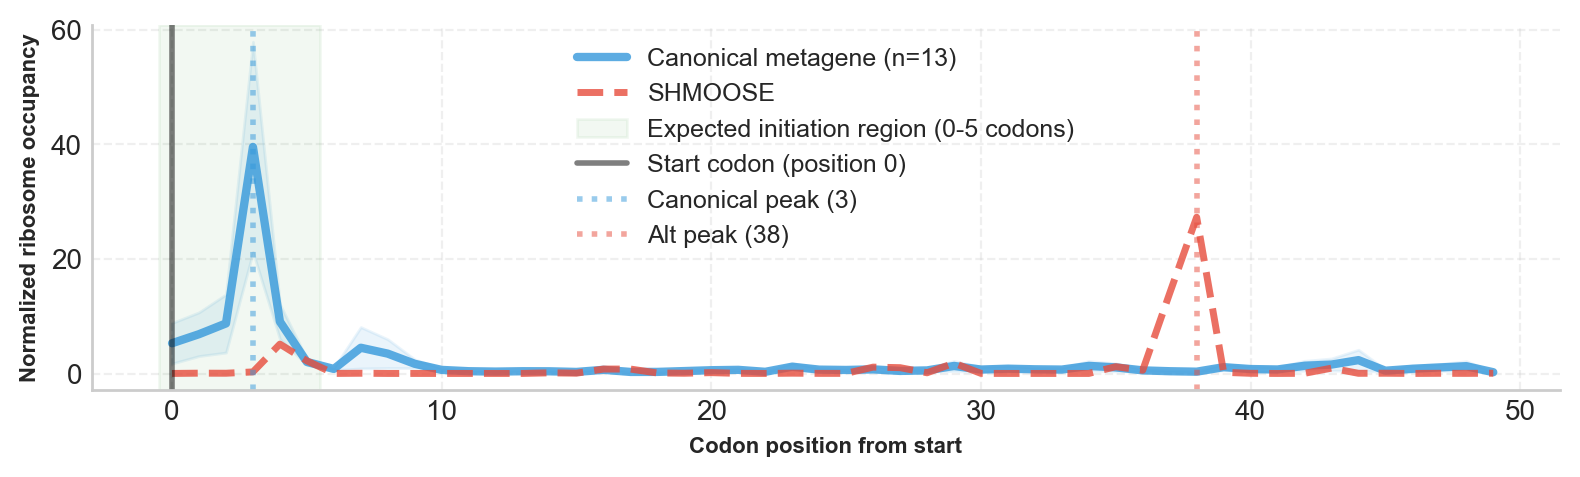

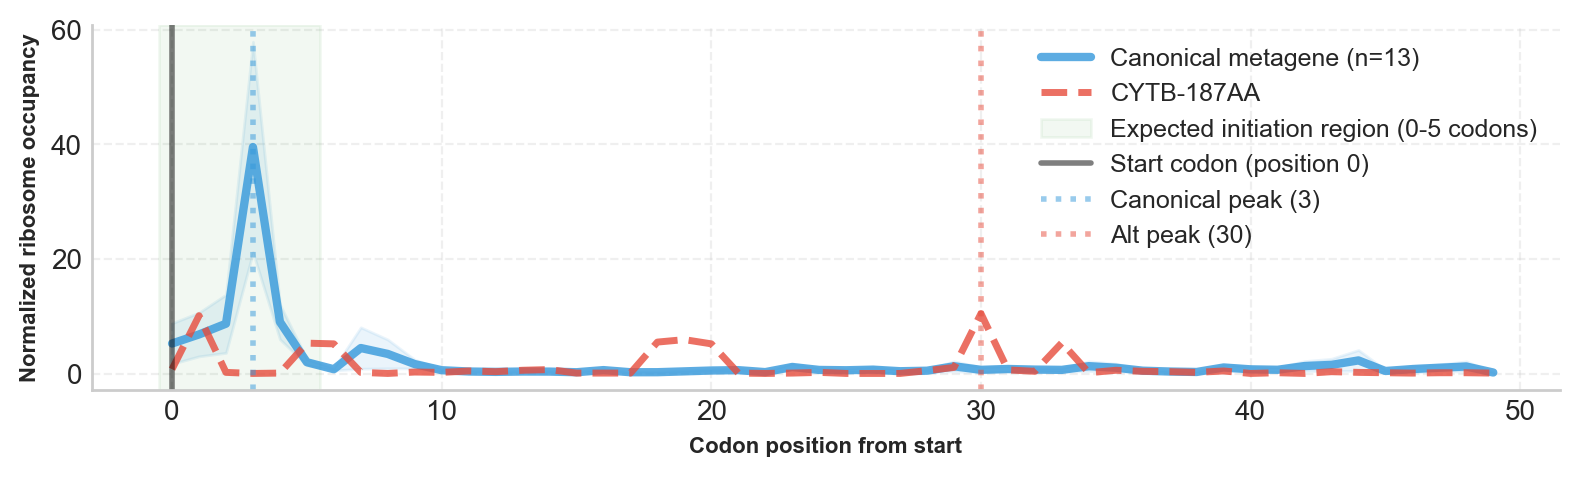

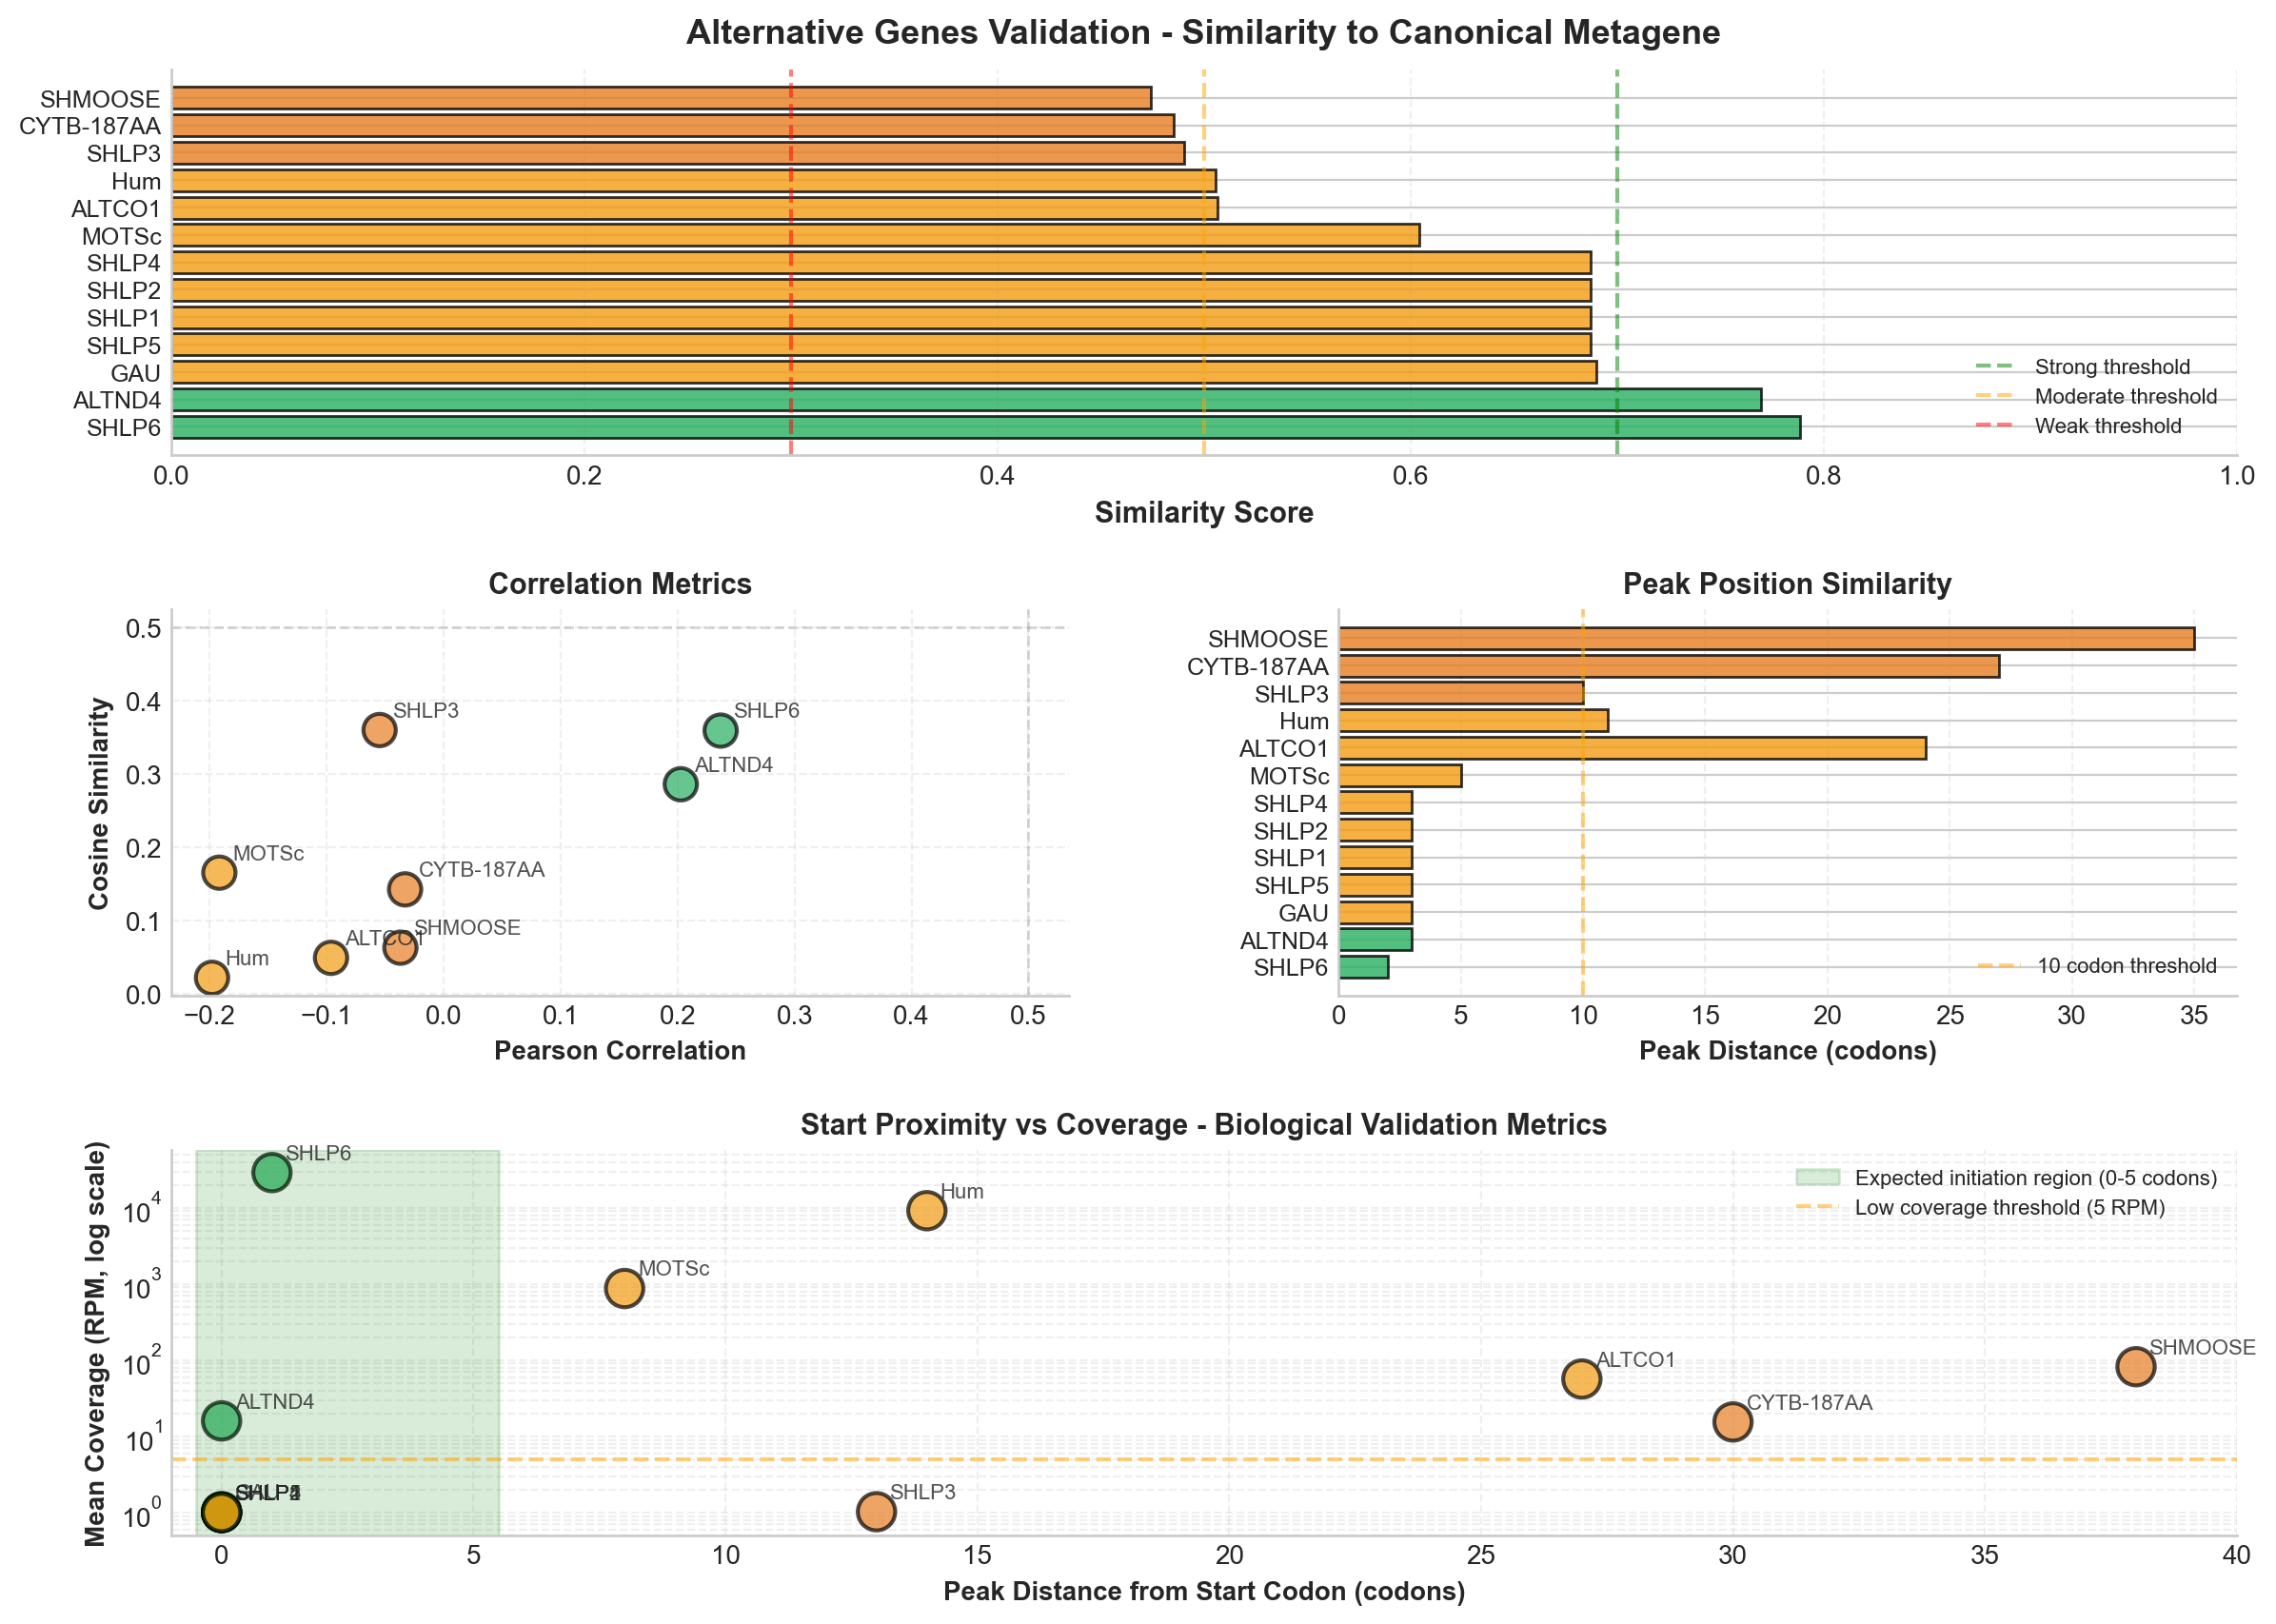

In [21]:
reload(mrae)
# Batch compare all overlapping genes to the expected initiation profile based on the canonical gene metaprofile
results_df_init, summary_fig = mrae.batch_compare_to_canonical(df_init, output_dir = os.path.join(PATH, 'figures', 'hek_ini_mitoriboseq', 'initiation_comparison_all_overlapping_genes'), plot_summary = True, plot_individual=True, indiv_figsize = (8,2.5), plot_metrics = False)

Saved comparison to c:\Users\shtolz\Desktop\multi_function_review\2025_mtdna_overlap_project\mitoriboseq_analysis\figures\hek_ini_mitoriboseq\initiation_comparison_shlp6.jpg


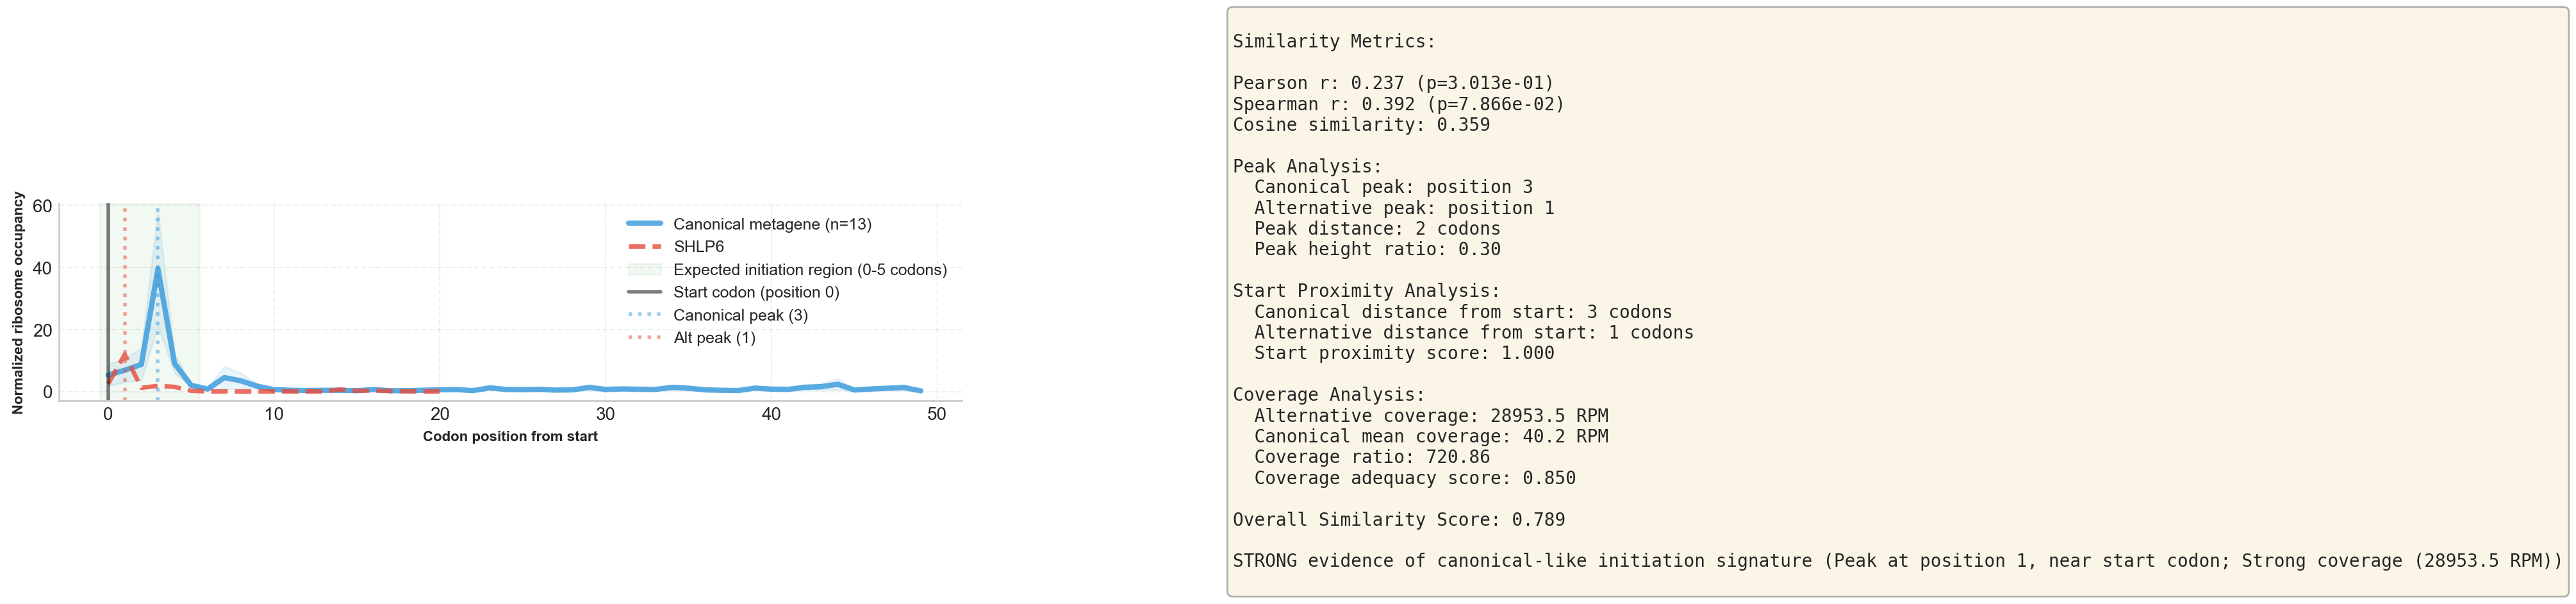

In [29]:
reload(mrae)
# Compare each overlapping gene to the expected initiation profile based on the canonical gene metaprofile
init_shlp6_comparison = mrae.compare_to_canonical_metagene(df_init, alternative_gene_id='gene_SHLP6', canonical_gene_ids=canonical_genes, save_path = os.path.join(PATH, 'figures', 'hek_ini_mitoriboseq', 'initiation_comparison_shlp6.jpg'), plot = True, figsize = (20,2))